<a href="https://colab.research.google.com/github/2stndard/polars/blob/main/mini_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import polars as pl
import plotly.express as px

In [ ]:
pl.Config(tbl_formatting="UTF8_FULL_CONDENSED")

In [13]:
import polars as pl
df_spotify = pl.read_csv("/content/spotify/universal_top_spotify_songs_1.csv", try_parse_dates=True, encoding = 'utf8')
print(df_spotify)

ComputeError: could not parse `VN` as dtype `i64` at column 'weekly_movement' (column number 6)

The current offset in the file is 22251 bytes.

You might want to try:
- increasing `infer_schema_length` (e.g. `infer_schema_length=10000`),
- specifying correct dtype with the `dtypes` argument
- setting `ignore_errors` to `True`,
- adding `VN` to the `null_values` list.

Original error: ```remaining bytes non-empty```

In [14]:
df_spotify = df_spotify.filter(pl.col('snapshot_date').dt.year()==2024).sort('snapshot_date')

NameError: name 'df_spotify' is not defined

놀라운 점은 데이터 품질 검사 결과가 일치하지 않는다는 것입니다. Pandas에서는 설명 열에 612개의 누락된 행이 있는 반면, Polars에서는 이를 볼 수 없습니다. 이는 Polars가 누락된 문자열을 빈 문자열 ""로 취급하여 Null 카운트에 나타나지 않기 때문입니다. 원하는 경우 .replace() 메서드를 사용하여 이러한 문자열을 Null 값으로 쉽게 바꿀 수 있습니다.

In [ ]:
df_spotify.shape

(1282230, 25)

In [ ]:
df_spotify.schema

Schema([('spotify_id', String),
        ('name', String),
        ('artists', String),
        ('daily_rank', Int64),
        ('daily_movement', Int64),
        ('weekly_movement', Int64),
        ('country', String),
        ('snapshot_date', Date),
        ('popularity', Int64),
        ('is_explicit', Boolean),
        ('duration_ms', Int64),
        ('album_name', String),
        ('album_release_date', Date),
        ('danceability', Float64),
        ('energy', Float64),
        ('key', Int64),
        ('loudness', Float64),
        ('mode', Int64),
        ('speechiness', Float64),
        ('acousticness', Float64),
        ('instrumentalness', Float64),
        ('liveness', Float64),
        ('valence', Float64),
        ('tempo', Float64),
        ('time_signature', Int64)])

In [ ]:
df_spotify.glimpse()

Rows: 1282230
Columns: 25
$ spotify_id          <str> '3rUGC1vUpkDG9CZFHMur1t', '0R6NfOiLzLj4O5VbYSJAjf', '1BxfuPKGuaTgP7aM0Bbdwr', '4xhsWYTOGcal8zt0J161CU', '2HRgqmZQC0MC7GeNuDIXHN', '3vkCueOmm7xQDoJ17W1Pm3', '7CyPwkp0oE8Ro9Dd5CUDjW', '05WVKTdZhlIMX4qqMLuo0f', '5XVdHRf4CAJ2Jm0uMIy5qY', '56y1jOTK0XSvJzVv9vHQBK'
$ name                <str> 'greedy', 'La Diabla', 'Cruel Summer', 'Lovin On Me', 'Seven (feat. Latto) (Explicit Ver.)', 'My Love Mine All Mine', 'One Of The Girls (with JENNIE, Lily Rose Depp)', 'BELLAKEO', 'La Víctima', 'Paint The Town Red'
$ artists             <str> 'Tate McRae', 'Xavi', 'Taylor Swift', 'Jack Harlow', 'Jung Kook, Latto', 'Mitski', 'The Weeknd, JENNIE, Lily-Rose Depp', 'Peso Pluma, Anitta', 'Xavi', 'Doja Cat'
$ daily_rank          <i64> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10
$ daily_movement      <i64> 0, 2, 0, -2, 2, -1, -1, 0, 1, -1
$ weekly_movement     <i64> 15, 22, 26, 22, 29, 22, 26, 29, 37, 28
$ country             <str> None, None, None, None, None, None, None

In [ ]:
with pl.Config(set_tbl_cols=10, set_tbl_rows=25):
    print(df_spotify.describe().transpose(include_header = True, header_name = 'statistics',
                                          column_names = ['count', 'null_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])[1:])

shape: (25, 10)
┌───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ count     ┆ null_coun ┆ mean      ┆ std       ┆ min       ┆ 25%       ┆ 50%       ┆ 75%       ┆ max      │
│ s         ┆ ---       ┆ t         ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ ---       ┆ str       ┆ ---       ┆ str       ┆ str       ┆ str       ┆ str       ┆ str       ┆ str       ┆ str      │
│ str       ┆           ┆ str       ┆           ┆           ┆           ┆           ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪══════════╡
│ spotify_i ┆ 1282230   ┆ 0         ┆ null      ┆ null      ┆ 003vvx7Ni ┆ null      ┆ null      ┆ null      ┆ 7zyWm8Ji │
│ d         ┆           ┆           ┆           ┆           ┆ y0yvhvHt4 ┆           ┆           ┆           ┆ hcIiYmfN │
│           ┆   

In [ ]:
df_spotify.is_duplicated().sum()

0

In [ ]:
print(pl.concat([df_spotify.select(pl.all().len()),
                 df_spotify.select(pl.all().null_count())],
                how = 'vertical').transpose(include_header = True, column_names = ['all_rows', 'null_counts']).
      filter(pl.col('null_counts')!=0))


shape: (5, 3)
┌────────────────────┬──────────┬─────────────┐
│ column             ┆ all_rows ┆ null_counts │
│ ---                ┆ ---      ┆ ---         │
│ str                ┆ u32      ┆ u32         │
╞════════════════════╪══════════╪═════════════╡
│ name               ┆ 1282230  ┆ 7           │
│ artists            ┆ 1282230  ┆ 6           │
│ country            ┆ 1282230  ┆ 17501       │
│ album_name         ┆ 1282230  ┆ 645         │
│ album_release_date ┆ 1282230  ┆ 482         │
└────────────────────┴──────────┴─────────────┘


In [ ]:
pl.Config(tbl_formatting="UTF8_FULL_CONDENSED")
df_spotify = df_spotify.with_columns(
    pl.when(pl.col('country').is_null()==True).
       then(pl.lit('WW')).
       otherwise(pl.col('country')).alias('country')
).drop_nulls()
print(df_spotify.select(pl.col(pl.String)))

shape: (1_281_585, 5)
┌────────────────────────┬─────────────────────────────┬───────────────────────┬─────────┬─────────────────────────────┐
│ spotify_id             ┆ name                        ┆ artists               ┆ country ┆ album_name                  │
│ ---                    ┆ ---                         ┆ ---                   ┆ ---     ┆ ---                         │
│ str                    ┆ str                         ┆ str                   ┆ str     ┆ str                         │
╞════════════════════════╪═════════════════════════════╪═══════════════════════╪═════════╪═════════════════════════════╡
│ 3rUGC1vUpkDG9CZFHMur1t ┆ greedy                      ┆ Tate McRae            ┆ WW      ┆ greedy                      │
│ 0R6NfOiLzLj4O5VbYSJAjf ┆ La Diabla                   ┆ Xavi                  ┆ WW      ┆ La Diabla                   │
│ 1BxfuPKGuaTgP7aM0Bbdwr ┆ Cruel Summer                ┆ Taylor Swift          ┆ WW      ┆ Lover                       │
│ 4xhsWYTO

In [ ]:
print(pl.concat([df_spotify.select(pl.all().len()),
                 df_spotify.select(pl.all().null_count())],
                how = 'vertical').transpose(include_header = True, column_names = ['all_rows', 'null_counts']).
      filter(pl.col('null_counts')!=0))


shape: (0, 3)
┌────────┬──────────┬─────────────┐
│ column ┆ all_rows ┆ null_counts │
│ ---    ┆ ---      ┆ ---         │
│ str    ┆ u32      ┆ u32         │
╞════════╪══════════╪═════════════╡
└────────┴──────────┴─────────────┘


In [ ]:
with pl.Config(tbl_rows=25):
    print(df_spotify.select(pl.all().n_unique()).transpose(include_header = True))

shape: (25, 2)
┌────────────────────┬──────────┐
│ column             ┆ column_0 │
│ ---                ┆ ---      │
│ str                ┆ u32      │
╞════════════════════╪══════════╡
│ spotify_id         ┆ 16360    │
│ name               ┆ 14550    │
│ artists            ┆ 9540     │
│ daily_rank         ┆ 50       │
│ daily_movement     ┆ 99       │
│ weekly_movement    ┆ 99       │
│ country            ┆ 73       │
│ snapshot_date      ┆ 354      │
│ popularity         ┆ 101      │
│ is_explicit        ┆ 2        │
│ duration_ms        ┆ 12804    │
│ album_name         ┆ 11086    │
│ album_release_date ┆ 2353     │
│ danceability       ┆ 774      │
│ energy             ┆ 929      │
│ key                ┆ 12       │
│ loudness           ┆ 7944     │
│ mode               ┆ 2        │
│ speechiness        ┆ 1237     │
│ acousticness       ┆ 2481     │
│ instrumentalness   ┆ 3513     │
│ liveness           ┆ 1383     │
│ valence            ┆ 1105     │
│ tempo              ┆ 11909    │

In [ ]:
key_levels = pl.Enum(['C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B'])
df_spotify = (df_spotify.with_columns(
    pl.col('key').cast(pl.String).replace(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
                                          ['C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B'])).
with_columns(
    pl.col('key').cast(key_levels)
).sort('key'))
print(df_spotify.select(pl.col('name'), pl.col('artists'), pl.col('key')))

shape: (1_281_585, 3)
┌─────────────────────────────────┬─────────────────────────────┬──────┐
│ name                            ┆ artists                     ┆ key  │
│ ---                             ┆ ---                         ┆ ---  │
│ str                             ┆ str                         ┆ enum │
╞═════════════════════════════════╪═════════════════════════════╪══════╡
│ I Wanna Be Yours                ┆ Arctic Monkeys              ┆ C    │
│ Love Me Again                   ┆ V                           ┆ C    │
│ Flowers                         ┆ Miley Cyrus                 ┆ C    │
│ What Was I Made For? [From The… ┆ Billie Eilish               ┆ C    │
│ I Remember Everything (feat. K… ┆ Zach Bryan, Kacey Musgraves ┆ C    │
│ …                               ┆ …                           ┆ …    │
│ Heart on the Window (with WEND… ┆ Jin, WENDY                  ┆ B    │
│ Sailor Song                     ┆ Gigi Perez                  ┆ B    │
│ Good Luck, Babe!           

In [ ]:
df_spotify = df_spotify.with_columns(
    pl.col('artists').str.split(', ')
).with_columns(
    pl.col('artists').list.get(0, null_on_oob=True).alias('main_vocal'),
    pl.col('artists').list.tail(-1).alias('featuring')
).with_columns(
    pl.when(pl.col('featuring').list.len()==0)
      .then(None)
      .otherwise(pl.col('featuring')).name.keep()
)
print(df_spotify.select(pl.col('name'), pl.col('artists'), pl.col('main_vocal'), pl.col('featuring')))

shape: (1_281_585, 4)
┌─────────────────────────────────┬─────────────────────────────────┬────────────────┬─────────────────────┐
│ name                            ┆ artists                         ┆ main_vocal     ┆ featuring           │
│ ---                             ┆ ---                             ┆ ---            ┆ ---                 │
│ str                             ┆ list[str]                       ┆ str            ┆ list[str]           │
╞═════════════════════════════════╪═════════════════════════════════╪════════════════╪═════════════════════╡
│ I Wanna Be Yours                ┆ ["Arctic Monkeys"]              ┆ Arctic Monkeys ┆ null                │
│ Love Me Again                   ┆ ["V"]                           ┆ V              ┆ null                │
│ Flowers                         ┆ ["Miley Cyrus"]                 ┆ Miley Cyrus    ┆ null                │
│ What Was I Made For? [From The… ┆ ["Billie Eilish"]               ┆ Billie Eilish  ┆ null               

In [ ]:
df_spotify.select(pl.col(pl.List(pl.String))).head()

artists,featuring
list[str],list[str]
"[""Arctic Monkeys""]",null
"[""V""]",null
"[""Miley Cyrus""]",null
"[""Billie Eilish""]",null
"[""Zach Bryan"", ""Kacey Musgraves""]","[""Kacey Musgraves""]"


In [ ]:
import pycountry_convert as pc
def get_continent_name(nation_code: str) -> str:
    continent_code = pc.country_alpha2_to_continent_code(nation_code)
    continent_dict = {
        "NA": "North America",
        "SA": "South America",
        "AS": "Asia",
        "AF": "Africa",
        "OC": "Oceania",
        "EU": "Europe",
        "AQ" : "Antarctica"
    }
    return continent_dict[continent_code]

In [ ]:
df_spotify = df_spotify.with_columns(
    pl.col('country'),
    pl.col('country').map_elements(get_continent_name, return_dtype = pl.String).alias('continent')
).with_columns(
    pl.when(pl.col('continent').is_null() == True)
      .then(pl.lit('Global'))
      .otherwise(pl.col('continent')).name.keep()
)
print(df_spotify.group_by('country').agg(pl.col('continent').first()))

shape: (73, 2)
┌─────────┬───────────────┐
│ country ┆ continent     │
│ ---     ┆ ---           │
│ str     ┆ str           │
╞═════════╪═══════════════╡
│ IS      ┆ Europe        │
│ AT      ┆ Europe        │
│ SG      ┆ Asia          │
│ NI      ┆ North America │
│ LU      ┆ Europe        │
│ …       ┆ …             │
│ CZ      ┆ Europe        │
│ IE      ┆ Europe        │
│ TH      ┆ Asia          │
│ GT      ┆ North America │
│ ZA      ┆ Africa        │
└─────────┴───────────────┘


In [ ]:
with pl.Config(set_tbl_cols=10, set_tbl_rows=25):
    print(df_spotify.select(pl.col([pl.Int64, pl.Float64])).
          describe().
          transpose(include_header = True,
                    header_name = 'columns',
                    column_names = ['count', 'null_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])[1:])

shape: (16, 10)
┌────────────┬───────────┬────────────┬───────────┬───────────┬───────────┬──────────┬──────────┬───────────┬──────────┐
│ columns    ┆ count     ┆ null_count ┆ mean      ┆ std       ┆ min       ┆ 25%      ┆ 50%      ┆ 75%       ┆ max      │
│ ---        ┆ ---       ┆ ---        ┆ ---       ┆ ---       ┆ ---       ┆ ---      ┆ ---      ┆ ---       ┆ ---      │
│ str        ┆ str       ┆ str        ┆ str       ┆ str       ┆ str       ┆ str      ┆ str      ┆ str       ┆ str      │
╞════════════╪═══════════╪════════════╪═══════════╪═══════════╪═══════════╪══════════╪══════════╪═══════════╪══════════╡
│ daily_rank ┆ 1281585.0 ┆ 0.0        ┆ 25.488521 ┆ 14.428953 ┆ 1.0       ┆ 13.0     ┆ 25.0     ┆ 38.0      ┆ 50.0     │
│            ┆           ┆            ┆ 635318765 ┆ 828238736 ┆           ┆          ┆          ┆           ┆          │
│ daily_move ┆ 1281585.0 ┆ 0.0        ┆ 0.9522794 ┆ 7.0485852 ┆ -49.0     ┆ -1.0     ┆ 0.0      ┆ 2.0       ┆ 49.0     │
│ ment       ┆  

In [ ]:
config = {
  'toImageButtonOptions': {
    'format': 'svg', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 400,
    'width': 600,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

In [ ]:
fig = px.histogram(df_spotify, x = 'daily_rank')
fig.update_layout(bargap=0.01, margin=dict(l=20, r=20, t=20, b=20), height = 400, width = 800)
fig.show(config=config)

In [ ]:
df_spotify.group_by('daily_movement').len(name = 'count').sort('count', descending = True)

daily_movement,count
i64,u32
0,308865
-1,152830
1,150029
-2,95520
2,93487
…,…
-42,3
-47,1
-46,1


In [ ]:
fig=px.histogram(df_spotify, x = 'daily_movement')
fig.update_layout(bargap=0.01, margin=dict(l=20, r=20, t=20, b=20), height = 400, width = 600)
fig.show(config=config)

In [ ]:
fig=px.histogram(df_spotify, x = 'weekly_movement')
fig.update_layout(bargap=0.01, margin=dict(l=20, r=20, t=20, b=20), height = 400, width = 600)
fig.show(config=config)

In [ ]:
fig=px.histogram(df_spotify, x = 'popularity')
fig.update_layout(bargap=0.01, margin=dict(l=20, r=20, t=20, b=20), height = 400, width = 600)
fig.show(config=config)

In [ ]:
fig = px.pie(df_spotify.group_by('is_explicit').len('count'), values='count')
fig.update_traces(textinfo='percent+label')
fig.update_layout(bargap=0.01, margin=dict(l=20, r=20, t=20, b=20))
fig.show(config=config)

In [ ]:
with pl.Config(set_tbl_cols=10, set_tbl_rows=25):
    print(df_spotify.select(pl.col([pl.String, pl.List(pl.String)])).
          describe().
          transpose(include_header = True,
                    header_name = 'columns',
                    column_names = ['count', 'null_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])[1:])

shape: (8, 10)
┌────────────┬───────────┬────────────┬──────┬──────┬──────────────────────┬──────┬──────┬──────┬──────────────────────┐
│ columns    ┆ count     ┆ null_count ┆ mean ┆ std  ┆ min                  ┆ 25%  ┆ 50%  ┆ 75%  ┆ max                  │
│ ---        ┆ ---       ┆ ---        ┆ ---  ┆ ---  ┆ ---                  ┆ ---  ┆ ---  ┆ ---  ┆ ---                  │
│ str        ┆ str       ┆ str        ┆ str  ┆ str  ┆ str                  ┆ str  ┆ str  ┆ str  ┆ str                  │
╞════════════╪═══════════╪════════════╪══════╪══════╪══════════════════════╪══════╪══════╪══════╪══════════════════════╡
│ spotify_id ┆ 1281585   ┆ 0          ┆ null ┆ null ┆ 003vvx7Niy0yvhvHt4a6 ┆ null ┆ null ┆ null ┆ 7zyWm8JihcIiYmfNkbze │
│            ┆           ┆            ┆      ┆      ┆ 8B                   ┆      ┆      ┆      ┆ HE                   │
│ name       ┆ 1281585   ┆ 0          ┆ null ┆ null ┆ "Se"                 ┆ null ┆ null ┆ null ┆ 한 페이지가 될 수    │
│            ┆          

In [ ]:
print(df_spotify.select(pl.col([pl.String]).unique().len()))

shape: (1, 6)
┌────────────┬───────┬─────────┬────────────┬────────────┬───────────┐
│ spotify_id ┆ name  ┆ country ┆ album_name ┆ main_vocal ┆ continent │
│ ---        ┆ ---   ┆ ---     ┆ ---        ┆ ---        ┆ ---       │
│ u32        ┆ u32   ┆ u32     ┆ u32        ┆ u32        ┆ u32       │
╞════════════╪═══════╪═════════╪════════════╪════════════╪═══════════╡
│ 16360      ┆ 14550 ┆ 73      ┆ 11086      ┆ 5770       ┆ 7         │
└────────────┴───────┴─────────┴────────────┴────────────┴───────────┘


In [ ]:
print(df_spotify.group_by('country').len().sort('len', descending = True))

shape: (73, 2)
┌─────────┬───────┐
│ country ┆ len   │
│ ---     ┆ ---   │
│ str     ┆ u32   │
╞═════════╪═══════╡
│ IT      ┆ 17720 │
│ DO      ┆ 17718 │
│ NI      ┆ 17715 │
│ CZ      ┆ 17709 │
│ PL      ┆ 17709 │
│ …       ┆ …     │
│ LU      ┆ 17281 │
│ VN      ┆ 16954 │
│ UY      ┆ 16952 │
│ VE      ┆ 16808 │
│ GB      ┆ 16682 │
└─────────┴───────┘


In [ ]:
fig = px.bar(
    (df_spotify.group_by('country').
     agg(pl.len().alias('count')).
     with_columns(pl.when(pl.col('country')=='KR').
                     then(pl.lit('KR')).
                     when(pl.col('country')=='WW').
                     then(pl.lit('Global')).
                     otherwise(pl.lit('Others')).alias('국가'))
                  ), x = 'country', y = 'count', color = '국가')
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(bargap=0.01, margin=dict(l=20, r=20, t=20, b=20), height = 400, width = 800)
fig.show(config=config)

In [ ]:
fig = px.bar(
    df_spotify.group_by('continent').agg(pl.col('country').unique().len()),
    x = 'continent', y = 'country', text = 'country'
)
fig.update_xaxes(categoryorder="total descending")
fig.update_layout( margin=dict(l=20, r=20, t=20, b=20), height = 400, width = 600)
fig.show(config=config)

In [ ]:
print(df_spotify.group_by('continent').agg(pl.col('country').unique().len()))

shape: (7, 2)
┌───────────────┬─────────┐
│ continent     ┆ country │
│ ---           ┆ ---     │
│ str           ┆ u32     │
╞═══════════════╪═════════╡
│ Africa        ┆ 4       │
│ Global        ┆ 1       │
│ Oceania       ┆ 2       │
│ North America ┆ 10      │
│ Asia          ┆ 17      │
│ Europe        ┆ 29      │
│ South America ┆ 10      │
└───────────────┴─────────┘


In [ ]:
config = {
  'toImageButtonOptions': {
    'format': 'svg', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

In [ ]:
fig = px.histogram(df_spotify, x = 'snapshot_date')
fig.update_layout( margin=dict(l=20, r=20, t=20, b=20))
fig.show(config=config)

In [ ]:
fig = px.box(df_spotify, x = 'continent', y = 'popularity')
fig.update_layout( margin=dict(l=20, r=20, t=20, b=20), height = 400, width = 600)
fig.show(config=config)

In [ ]:
fig = px.box(df_spotify.filter(pl.col('country').is_in(['WW', 'KR', 'US', 'BR', 'GB', 'AU', 'NG'])),
             x = 'country', y = 'popularity')
fig.update_layout( margin=dict(l=20, r=20, t=20, b=20), height = 400, width = 600)
fig.show(config=config)

In [ ]:
fig = px.box((df_spotify.filter(pl.col('country').is_in(['KR', 'GB', 'WW', 'US'])).
 group_by('country', 'name').
 agg(
     pl.all().sort_by('snapshot_date').first()).
 select(pl.col('country', 'name'),
     (pl.col('snapshot_date')-pl.col('album_release_date')).dt.total_days().alias('duration'))
), x = 'country', y = 'duration')
fig.update_layout( margin=dict(l=20, r=20, t=20, b=20), height = 400, width = 600)
fig.show(config=config)

In [ ]:
print(df_spotify.filter(pl.col('country').is_in(['KR', 'GB', 'WW', 'US'])).
 group_by('country', 'name').
 agg(
     pl.all().sort_by('snapshot_date').first()).
 select(pl.col('country', 'name'),
     (pl.col('snapshot_date')-pl.col('album_release_date')).alias('duration')).
      group_by('country').
      agg(pl.col('duration').mean().dt.total_days().alias('duration_mean'),
          pl.col('duration').median().dt.total_days().alias('duration_median'))
)

shape: (4, 3)
┌─────────┬───────────────┬─────────────────┐
│ country ┆ duration_mean ┆ duration_median │
│ ---     ┆ ---           ┆ ---             │
│ str     ┆ i64           ┆ i64             │
╞═════════╪═══════════════╪═════════════════╡
│ US      ┆ 1870          ┆ 3               │
│ KR      ┆ 610           ┆ 2               │
│ GB      ┆ 2948          ┆ 19              │
│ WW      ┆ 1722          ┆ 4               │
└─────────┴───────────────┴─────────────────┘


In [ ]:
print(df_spotify.filter(pl.col('country').is_in(['WW', 'KR', 'US', 'BR', 'GB', 'AU', 'NG'])).
 group_by('country', 'name').
 agg(
     (pl.col('snapshot_date').max()-pl.col('snapshot_date').min()).alias('duration')
 ).group_by('country').agg(pl.col('duration').mean().dt.total_days())
)

shape: (7, 2)
┌─────────┬──────────┐
│ country ┆ duration │
│ ---     ┆ ---      │
│ str     ┆ i64      │
╞═════════╪══════════╡
│ AU      ┆ 56       │
│ KR      ┆ 61       │
│ GB      ┆ 42       │
│ WW      ┆ 47       │
│ BR      ┆ 51       │
│ US      ┆ 38       │
│ NG      ┆ 49       │
└─────────┴──────────┘


In [ ]:
fig = px.box(df_spotify.filter(pl.col('country').is_in(['WW', 'KR', 'US', 'BR', 'GB', 'AU', 'NG'])),
       x = 'country', y = 'popularity', color = 'is_explicit')
fig.update_layout( margin=dict(l=20, r=20, t=20, b=20), height = 400, width = 800)
fig.show(config=config)

In [ ]:
print(df_spotify.
      filter(pl.col('country').is_in(['WW', 'KR', 'US', 'BR', 'GB', 'AU', 'NG'])).
      group_by('country').
      agg(
          ((pl.col('is_explicit').filter(pl.col('is_explicit')==True).len()) / (pl.col('is_explicit').len())*100).
          round(2).alias('Explicit_True(%)'),
          ((pl.col('is_explicit').filter(pl.col('is_explicit')==False).len()) / (pl.col('is_explicit').len())*100).
          round(2).alias('Explicit_False(%)')
      )
     )

shape: (7, 3)
┌─────────┬──────────────────┬───────────────────┐
│ country ┆ Explicit_True(%) ┆ Explicit_False(%) │
│ ---     ┆ ---              ┆ ---               │
│ str     ┆ f64              ┆ f64               │
╞═════════╪══════════════════╪═══════════════════╡
│ BR      ┆ 25.55            ┆ 74.45             │
│ KR      ┆ 9.28             ┆ 90.72             │
│ NG      ┆ 25.98            ┆ 74.02             │
│ AU      ┆ 33.92            ┆ 66.08             │
│ GB      ┆ 32.69            ┆ 67.31             │
│ WW      ┆ 37.39            ┆ 62.61             │
│ US      ┆ 46.25            ┆ 53.75             │
└─────────┴──────────────────┴───────────────────┘


In [ ]:
print(df_spotify.select(pl.col(pl.Int64), pl.col(pl.Float64)).
      corr().
      with_columns(
          index = pl.lit(pl.Series(df_spotify.select(pl.col(pl.Int64), pl.col(pl.Float64)).columns))
      ).
      unpivot(index = 'index').
      filter(pl.col('index')!=pl.col('variable')).
#      filter((pl.col('value')>0.5)|(pl.col('value')<-0.5)).
      sort('value', descending = True)
     )

shape: (240, 3)
┌─────────────────┬─────────────────┬───────────┐
│ index           ┆ variable        ┆ value     │
│ ---             ┆ ---             ┆ ---       │
│ str             ┆ str             ┆ f64       │
╞═════════════════╪═════════════════╪═══════════╡
│ loudness        ┆ energy          ┆ 0.724866  │
│ energy          ┆ loudness        ┆ 0.724866  │
│ valence         ┆ danceability    ┆ 0.417625  │
│ danceability    ┆ valence         ┆ 0.417625  │
│ weekly_movement ┆ daily_movement  ┆ 0.368973  │
│ …               ┆ …               ┆ …         │
│ daily_rank      ┆ weekly_movement ┆ -0.264775 │
│ loudness        ┆ acousticness    ┆ -0.435017 │
│ acousticness    ┆ loudness        ┆ -0.435017 │
│ acousticness    ┆ energy          ┆ -0.527654 │
│ energy          ┆ acousticness    ┆ -0.527654 │
└─────────────────┴─────────────────┴───────────┘


In [ ]:
print(df_spotify.filter(pl.col('country')=='KR').
      select(pl.col(pl.Int64), pl.col(pl.Float64)).
      corr().
      with_columns(index = pl.lit(pl.Series(df_spotify.select(pl.col(pl.Int64), pl.col(pl.Float64)).columns))).
      unpivot(index = 'index').
      filter(pl.col('index')=='popularity').sort('value', descending = True)
     )

shape: (16, 3)
┌────────────┬─────────────────┬───────────┐
│ index      ┆ variable        ┆ value     │
│ ---        ┆ ---             ┆ ---       │
│ str        ┆ str             ┆ f64       │
╞════════════╪═════════════════╪═══════════╡
│ popularity ┆ popularity      ┆ 1.0       │
│ popularity ┆ danceability    ┆ 0.238155  │
│ popularity ┆ valence         ┆ 0.093143  │
│ popularity ┆ speechiness     ┆ 0.079657  │
│ popularity ┆ energy          ┆ 0.011777  │
│ …          ┆ …               ┆ …         │
│ popularity ┆ acousticness    ┆ -0.143925 │
│ popularity ┆ weekly_movement ┆ -0.175446 │
│ popularity ┆ daily_movement  ┆ -0.189139 │
│ popularity ┆ duration_ms     ┆ -0.19866  │
│ popularity ┆ daily_rank      ┆ -0.214647 │
└────────────┴─────────────────┴───────────┘


In [ ]:
config = {
  'toImageButtonOptions': {
    'format': 'svg', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 400,
    'width': 600,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

In [ ]:
fig = px.scatter(df_spotify.sample(fraction = 0.1),
           x = 'loudness', y = 'energy', trendline = 'ols', trendline_color_override="red", opacity = 0.1, range_y = [0, 1])
fig.update_layout( margin=dict(l=20, r=20, t=20, b=20), height = 400, width = 600)
fig.show(config = config)

In [ ]:
result = px.get_trendline_results(fig)
print(result.px_fit_results.iloc[0].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                 1.425e+05
Date:                Wed, 15 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:34:22   Log-Likelihood:                 99309.
No. Observations:              128158   AIC:                        -1.986e+05
Df Residuals:                  128156   BIC:                        -1.986e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9487      0.001   1131.991      0.0

In [ ]:
fig = px.scatter(df_spotify.sample(fraction = 0.1),
           x = 'acousticness', y = 'energy', trendline = 'ols', trendline_color_override="red", opacity = 0.1)
fig.update_layout( margin=dict(l=20, r=20, t=20, b=20), height = 400, width = 600)
fig.show(config = config)

In [ ]:
result = px.get_trendline_results(fig)
print(result.px_fit_results.iloc[0].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                 5.027e+04
Date:                Wed, 15 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:34:39   Log-Likelihood:                 72938.
No. Observations:              128158   AIC:                        -1.459e+05
Df Residuals:                  128156   BIC:                        -1.459e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7483      0.001   1327.134      0.0

In [ ]:
print(df_spotify.select(pl.col(pl.Int64), pl.col(pl.Float64)).corr())

shape: (16, 16)
┌────────────┬────────────────┬─────────────────┬────────────┬───┬─────────────────┬───────────┬───────────┬───────────┐
│ daily_rank ┆ daily_movement ┆ weekly_movement ┆ popularity ┆ … ┆ instrumentalnes ┆ liveness  ┆ valence   ┆ tempo     │
│ ---        ┆ ---            ┆ ---             ┆ ---        ┆   ┆ s               ┆ ---       ┆ ---       ┆ ---       │
│ f64        ┆ f64            ┆ f64             ┆ f64        ┆   ┆ ---             ┆ f64       ┆ f64       ┆ f64       │
│            ┆                ┆                 ┆            ┆   ┆ f64             ┆           ┆           ┆           │
╞════════════╪════════════════╪═════════════════╪════════════╪═══╪═════════════════╪═══════════╪═══════════╪═══════════╡
│ 1.0        ┆ -0.145062      ┆ -0.264775       ┆ -0.112801  ┆ … ┆ 0.013488        ┆ 0.030228  ┆ -0.057007 ┆ 0.018175  │
│ -0.145062  ┆ 1.0            ┆ 0.368973        ┆ -0.156114  ┆ … ┆ 0.013345        ┆ 0.004058  ┆ -0.003661 ┆ -0.002467 │
│ -0.264775  ┆ 0

In [ ]:
config = {
  'toImageButtonOptions': {
    'format': 'svg', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 600,
    'width': 800,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

In [ ]:
fig = px.imshow((df_spotify.select(pl.col(pl.Int64), pl.col(pl.Float64)).
           corr().
           with_columns(pl.all().round(1))),
          y = df_spotify.select(pl.col(pl.Int64), pl.col(pl.Float64)).columns,
          text_auto=True, aspect="auto", color_continuous_scale='RdBu_r')
fig.update_layout( margin=dict(l=20, r=20, t=20, b=20), height = 600, width = 800)
fig.show()

In [ ]:
(df_spotify.filter(pl.col('country')=='WW').
 group_by('main_vocal').
 agg(pl.col('name').unique().len()).
 sort('name', descending = True).head(10)
)

main_vocal,name
str,u32
"""Taylor Swift""",36
"""Beyoncé""",17
"""Kendrick Lamar""",17
"""Future""",16
"""Sabrina Carpenter""",15
"""Tyler""",15
"""Kanye West""",15
"""Eminem""",14
"""Ariana Grande""",14


In [ ]:
config = {
  'toImageButtonOptions': {
    'format': 'svg', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 400,
    'width': 600,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

In [ ]:
expr_1 = pl.col('name').unique().len().over('main_vocal')

df_spotify_EDA1 = (
pl.concat([(df_spotify.filter(pl.col('country')=='WW').
            select(pl.col('main_vocal').alias('Global_Main_Vocal'), expr_1.alias('Global_Songs')).
            unique().sort('Global_Songs', descending = True).head(10)),
           (df_spotify.filter(pl.col('country')=='KR').
            select(pl.col('main_vocal').alias('KR_Main_Vocal'), expr_1.alias('KR_Songs')).
            unique().sort('KR_Songs', descending = True).head(10)),
           (df_spotify.filter(pl.col('country')=='US').
            select(pl.col('main_vocal').alias('US_Main_Vocal'), expr_1.alias('US_Songs')).
            unique().sort('US_Songs', descending = True).head(10)),
           (df_spotify.filter(pl.col('country')=='GB').
            select(pl.col('main_vocal').alias('GB_Main_Vocal'), expr_1.alias('GB_Songs')).
            unique().sort('GB_Songs', descending = True).head(10))],
          how = 'horizontal').
    with_columns(pl.int_range(1, 11).alias('rank')).
    select(pl.col('rank'), pl.all().exclude('rank'))
)
with pl.Config(set_tbl_cols=12, set_tbl_rows=25):
    print(df_spotify_EDA1)

shape: (10, 9)
┌──────┬───────────────┬──────────────┬───────────────┬──────────┬───────────────┬──────────┬───────────────┬──────────┐
│ rank ┆ Global_Main_V ┆ Global_Songs ┆ KR_Main_Vocal ┆ KR_Songs ┆ US_Main_Vocal ┆ US_Songs ┆ GB_Main_Vocal ┆ GB_Songs │
│ ---  ┆ ocal          ┆ ---          ┆ ---           ┆ ---      ┆ ---           ┆ ---      ┆ ---           ┆ ---      │
│ i64  ┆ ---           ┆ u32          ┆ str           ┆ u32      ┆ str           ┆ u32      ┆ str           ┆ u32      │
│      ┆ str           ┆              ┆               ┆          ┆               ┆          ┆               ┆          │
╞══════╪═══════════════╪══════════════╪═══════════════╪══════════╪═══════════════╪══════════╪═══════════════╪══════════╡
│ 1    ┆ Taylor Swift  ┆ 36           ┆ Jimin         ┆ 21       ┆ Taylor Swift  ┆ 37       ┆ Taylor Swift  ┆ 36       │
│ 2    ┆ Beyoncé       ┆ 17           ┆ Lim Young     ┆ 19       ┆ Future        ┆ 35       ┆ Oasis         ┆ 29       │
│      ┆         

In [ ]:
(df_spotify_EDA1.style.
 tab_header(title = '2024년 메인보컬 Top 10').
 tab_stub(rowname_col = 'rank').
 tab_spanner('글로벌', ['Global_Main_Vocal', 'Global_Songs']).
 tab_spanner('한국', ['KR_Main_Vocal', 'KR_Songs']).
 tab_spanner('미국', ['US_Main_Vocal', 'US_Songs']).
 tab_spanner('영국', ['GB_Main_Vocal', 'GB_Songs']).
 cols_align(align = 'center').
 cols_label(Global_Main_Vocal='메인보컬', KR_Main_Vocal='메인보컬',
            US_Main_Vocal='메인보컬', GB_Main_Vocal='메인보컬').
 cols_label(Global_Songs='노래수', KR_Songs='노래수',
            US_Songs='노래수', GB_Songs='노래수')
)

GT(_tbl_data=shape: (10, 9)
┌──────┬─────────────────┬──────────────┬─────────────────┬───┬────────────────┬──────────┬─────────────────┬──────────┐
│ rank ┆ Global_Main_Voc ┆ Global_Songs ┆ KR_Main_Vocal   ┆ … ┆ US_Main_Vocal  ┆ US_Songs ┆ GB_Main_Vocal   ┆ GB_Songs │
│ ---  ┆ al              ┆ ---          ┆ ---             ┆   ┆ ---            ┆ ---      ┆ ---             ┆ ---      │
│ i64  ┆ ---             ┆ u32          ┆ str             ┆   ┆ str            ┆ u32      ┆ str             ┆ u32      │
│      ┆ str             ┆              ┆                 ┆   ┆                ┆          ┆                 ┆          │
╞══════╪═════════════════╪══════════════╪═════════════════╪═══╪════════════════╪══════════╪═════════════════╪══════════╡
│ 1    ┆ Taylor Swift    ┆ 36           ┆ Jimin           ┆ … ┆ Taylor Swift   ┆ 37       ┆ Taylor Swift    ┆ 36       │
│ 2    ┆ Beyoncé         ┆ 17           ┆ Lim Young Woong ┆ … ┆ Future         ┆ 35       ┆ Oasis           ┆ 29       │
│ 3    ┆ Kendrick Lamar  ┆ 17           ┆ aespa           ┆ … ┆ Beyoncé        ┆ 23       ┆ Kanye West      ┆ 20       │
│ 4    ┆ Future          ┆ 16           ┆ DAY6            ┆ … ┆ Kendrick Lamar ┆ 20       ┆ Eminem          ┆ 19       │
│ 5    ┆ Kanye West      ┆ 15           ┆ NewJeans        ┆ … ┆ Kanye West     ┆ 18       ┆ Beyoncé         ┆ 19       │
│ 6    ┆ Tyler           ┆ 15           ┆ Jung Kook       ┆ … ┆ Zach Bryan     ┆ 18       ┆ Ariana Grande   ┆ 16       │
│ 7    ┆ Sabrina         ┆ 15           ┆ V               ┆ … ┆ Post Malone    ┆ 17       ┆ Kendrick Lamar  ┆ 16       │
│      ┆ Carpenter       ┆              ┆                 ┆   ┆                ┆          ┆                 ┆          │
│ 8    ┆ Eminem          ┆ 14           ┆ LE SSERAFIM     ┆ … ┆ Eminem         ┆ 17       ┆ Sabrina         ┆ 15       │
│      ┆                 ┆              ┆                 ┆   ┆                ┆          ┆ Carpenter       ┆          │
│ 9    ┆ Ariana Grande   ┆ 14           ┆ Kanye West      ┆ … ┆ Ariana Grande  ┆ 17       ┆ Tyler           ┆ 15       │
│ 10   ┆ Billie Eilish   ┆ 11           ┆ YANGHONGWON     ┆ … ┆ Tyler          ┆ 16       ┆ Charli xcx      ┆ 14       │
└──────┴─────────────────┴──────────────┴─────────────────┴───┴────────────────┴──────────┴─────────────────┴──────────┘, _body=<great_tables._gt_data.Body object at 0x0000020ACB0B5D90>, _boxhead=Boxhead([ColInfo(var='rank', type=<ColInfoTypeEnum.stub: 2>, column_label='rank', column_align='center', column_width=None), ColInfo(var='Global_Main_Vocal', type=<ColInfoTypeEnum.default: 1>, column_label='메인보컬', column_align='center', column_width=None), ColInfo(var='Global_Songs', type=<ColInfoTypeEnum.default: 1>, column_label='노래수', column_align='center', column_width=None), ColInfo(var='KR_Main_Vocal', type=<ColInfoTypeEnum.default: 1>, column_label='메인보컬', column_align='center', column_width=None), ColInfo(var='KR_Songs', type=<ColInfoTypeEnum.default: 1>, column_label='노래수', column_align='center', column_width=None), ColInfo(var='US_Main_Vocal', type=<ColInfoTypeEnum.default: 1>, column_label='메인보컬', column_align='center', column_width=None), ColInfo(var='US_Songs', type=<ColInfoTypeEnum.default: 1>, column_label='노래수', column_align='center', column_width=None), ColInfo(var='GB_Main_Vocal', type=<ColInfoTypeEnum.default: 1>, column_label='메인보컬', column_align='center', column_width=None), ColInfo(var='GB_Songs', type=<ColInfoTypeEnum.default: 1>, column_label='노래수', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x0000020AB89A1FA0>, _spanners=Spanners([SpannerInfo(spanner_id='글로벌', spanner_level=0, spanner_label='글로벌', spanner_units=None, spanner_pattern=None, vars=['Global_Main_Vocal', 'Global_Songs'], built=None), SpannerInfo(spanner_id='한국', spanner_level=0, spanner_label='한국', spanner_units=None, spanner_pattern=None, vars=['KR_Main_Vocal', 'KR_Songs'], built=None), SpannerInfo(spanner_id='미국', spanner_level=0, spanner_

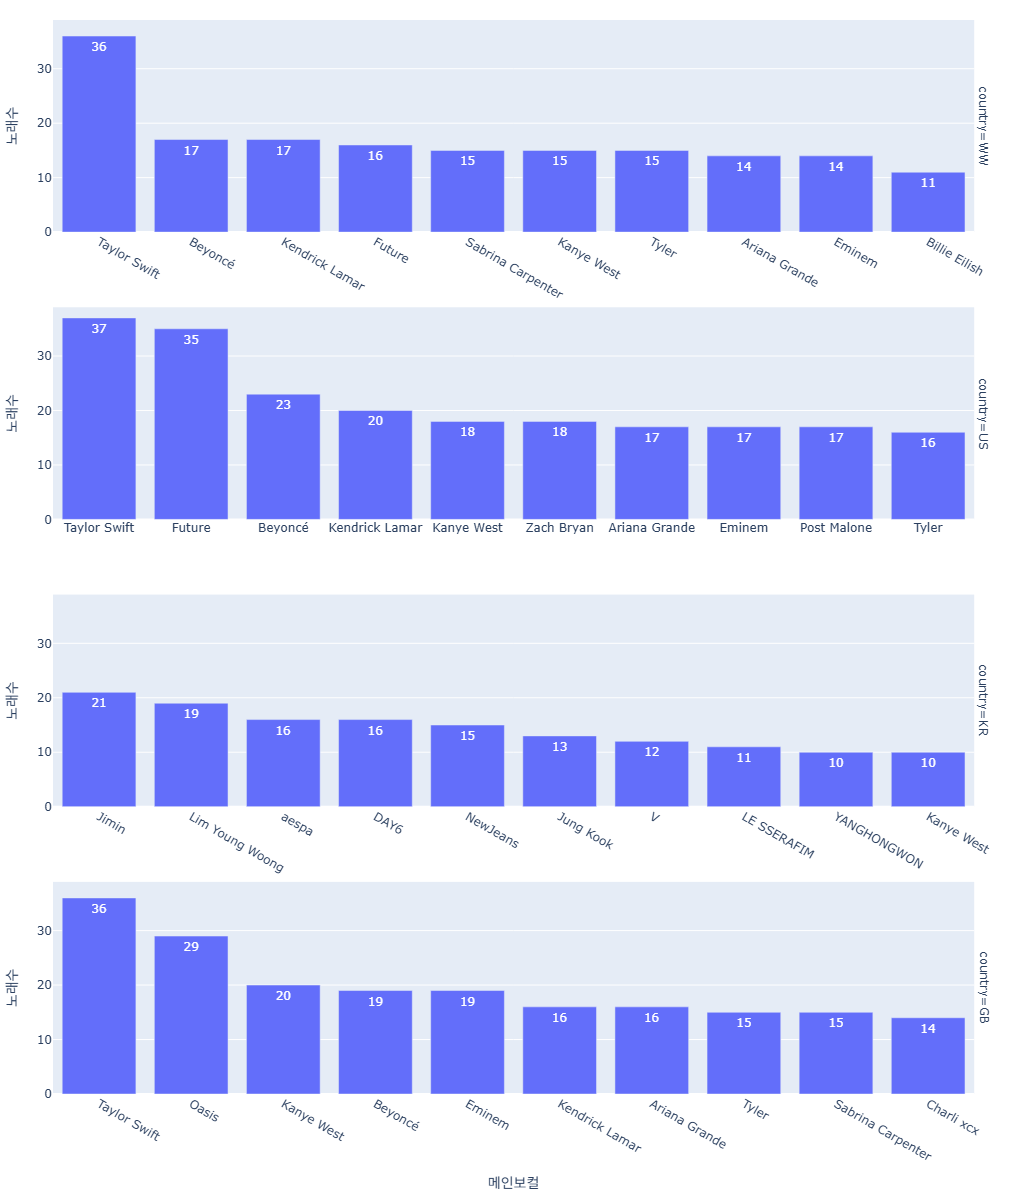

In [ ]:
fig = px.bar((df_spotify.filter(pl.col('country').is_in(['WW', 'KR', 'US', 'GB'])).
              group_by('country', 'main_vocal').
              agg(pl.col('name').unique().len()).sort(['country', 'name'], descending=True).
              group_by('country', maintain_order = True).head(10)),
             x = 'main_vocal', y = 'name', text = 'name', facet_row = 'country',
             labels = {'main_vocal':'메인보컬', 'name': '노래수'}, facet_row_spacing=0.07)
fig.update_xaxes(matches=None, showticklabels=True)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=100), height = 1200, width = 600)
fig.show(config={
  'toImageButtonOptions': {
    'format': 'svg', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 1200,
    'width': 600,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
})

In [ ]:
df_spotify_EDA2 = (
pl.concat([(df_spotify.filter(pl.col('country')=='WW').
            select(pl.col('name').alias('Global_Song'),
                   pl.col('main_vocal').alias('Global_Vocal'),
                   pl.col('name').len().over('name').alias('Global_Day')).
            unique().sort('Global_Day', descending = True).head(10)),
           (df_spotify.filter(pl.col('country')=='KR').
            select(pl.col('name').alias('KR_Song'),
                   pl.col('main_vocal').alias('KR_Vocal'),
                   pl.col('name').len().over('name').alias('KR_Day')).
            unique().sort('KR_Day', descending = True).head(10)),
           (df_spotify.filter(pl.col('country')=='US').
            select(pl.col('name').alias('US_Song'),
                   pl.col('main_vocal').alias('US_Vocal'),
                   pl.col('name').len().over('name').alias('US_Day')).
            unique().sort('US_Day', descending = True).head(10)),
           (df_spotify.filter(pl.col('country')=='GB').
            select(pl.col('name').alias('GB_Song'),
                   pl.col('main_vocal').alias('GB_Vocal'),
                   pl.col('name').len().over('name').alias('GB_Day')).
            unique().sort('GB_Day', descending = True).head(10))],
          how = 'horizontal').
    with_columns(pl.int_range(1, 11).alias('rank')).
    select(pl.col('rank'), pl.all().exclude('rank'))
)

with pl.Config(set_tbl_cols=12, set_tbl_rows=25):
    print(df_spotify_EDA2)

shape: (10, 13)
┌──────┬─────────┬─────────┬─────────┬─────────┬─────────┬───┬─────────┬─────────┬────────┬─────────┬─────────┬────────┐
│ rank ┆ Global_ ┆ Global_ ┆ Global_ ┆ KR_Song ┆ KR_Voca ┆ … ┆ US_Song ┆ US_Voca ┆ US_Day ┆ GB_Song ┆ GB_Voca ┆ GB_Day │
│ ---  ┆ Song    ┆ Vocal   ┆ Day     ┆ ---     ┆ l       ┆   ┆ ---     ┆ l       ┆ ---    ┆ ---     ┆ l       ┆ ---    │
│ i64  ┆ ---     ┆ ---     ┆ ---     ┆ str     ┆ ---     ┆   ┆ str     ┆ ---     ┆ u32    ┆ str     ┆ ---     ┆ u32    │
│      ┆ str     ┆ str     ┆ u32     ┆         ┆ str     ┆   ┆         ┆ str     ┆        ┆         ┆ str     ┆        │
╞══════╪═════════╪═════════╪═════════╪═════════╪═════════╪═══╪═════════╪═════════╪════════╪═════════╪═════════╪════════╡
│ 1    ┆ One Of  ┆ The     ┆ 341     ┆ Closer  ┆ Jimin   ┆ … ┆ Stick   ┆ Noah    ┆ 326    ┆ Stick   ┆ Noah    ┆ 327    │
│      ┆ The     ┆ Weeknd  ┆         ┆ Than    ┆         ┆   ┆ Season  ┆ Kahan   ┆        ┆ Season  ┆ Kahan   ┆        │
│      ┆ Girls  

In [ ]:
(df_spotify_EDA2.style.tab_header(title = '2024년 노래 Top 10').
 tab_stub(rowname_col = 'rank').
 tab_spanner('글로벌', ['Global_Song', 'Global_Vocal', 'Global_Day']).
 tab_spanner('한국', ['KR_Song', 'KR_Vocal', 'KR_Day']).
 tab_spanner('미국', ['US_Song', 'US_Vocal', 'US_Day']).
 tab_spanner('영국', ['GB_Song', 'GB_Vocal', 'GB_Day']).
 cols_align(align = 'center').
 cols_label(Global_Song='노래', Global_Vocal='메인보컬', Global_Day = '차트일수',
            KR_Song='노래', KR_Vocal='메인보컬', KR_Day = '차트일수',
            US_Song='노래', US_Vocal='메인보컬', US_Day = '차트일수',
            GB_Song='노래', GB_Vocal='메인보컬', GB_Day = '차트일수')
)

GT(_tbl_data=shape: (10, 13)
┌──────┬────────────────────┬────────────────┬────────────┬───┬────────┬──────────────────┬───────────────────┬────────┐
│ rank ┆ Global_Song        ┆ Global_Vocal   ┆ Global_Day ┆ … ┆ US_Day ┆ GB_Song          ┆ GB_Vocal          ┆ GB_Day │
│ ---  ┆ ---                ┆ ---            ┆ ---        ┆   ┆ ---    ┆ ---              ┆ ---               ┆ ---    │
│ i64  ┆ str                ┆ str            ┆ u32        ┆   ┆ u32    ┆ str              ┆ str               ┆ u32    │
╞══════╪════════════════════╪════════════════╪════════════╪═══╪════════╪══════════════════╪═══════════════════╪════════╡
│ 1    ┆ One Of The Girls   ┆ The Weeknd     ┆ 341        ┆ … ┆ 326    ┆ Stick Season     ┆ Noah Kahan        ┆ 327    │
│      ┆ (with JENNIE,…     ┆                ┆            ┆   ┆        ┆                  ┆                   ┆        │
│ 2    ┆ I Wanna Be Yours   ┆ Arctic Monkeys ┆ 341        ┆ … ┆ 325    ┆ Lose Control     ┆ Teddy Swims       ┆ 320    │
│ 3    ┆ Lose Control       ┆ Teddy Swims    ┆ 340        ┆ … ┆ 322    ┆ Beautiful Things ┆ Benson Boone      ┆ 309    │
│ 4    ┆ Beautiful Things   ┆ Benson Boone   ┆ 328        ┆ … ┆ 317    ┆ Mr. Brightside   ┆ The Killers       ┆ 300    │
│ 5    ┆ The Night We Met   ┆ Lord Huron     ┆ 324        ┆ … ┆ 313    ┆ Cruel Summer     ┆ Taylor Swift      ┆ 272    │
│ 6    ┆ Cruel Summer       ┆ Taylor Swift   ┆ 290        ┆ … ┆ 272    ┆ Scared To Start  ┆ Michael Marcagi   ┆ 266    │
│ 7    ┆ LUNA               ┆ Feid           ┆ 276        ┆ … ┆ 263    ┆ Too Sweet        ┆ Hozier            ┆ 244    │
│ 8    ┆ End of Beginning   ┆ Djo            ┆ 266        ┆ … ┆ 247    ┆ Unwritten        ┆ Natasha           ┆ 243    │
│      ┆                    ┆                ┆            ┆   ┆        ┆                  ┆ Bedingfield       ┆        │
│ 9    ┆ we can't be        ┆ Ariana Grande  ┆ 255        ┆ … ┆ 241    ┆ The Night We Met ┆ Lord Huron        ┆ 232    │
│      ┆ friends (wait for  ┆                ┆            ┆   ┆        ┆                  ┆                   ┆        │
│      ┆ …                  ┆                ┆            ┆   ┆        ┆                  ┆                   ┆        │
│ 10   ┆ Too Sweet          ┆ Hozier         ┆ 251        ┆ … ┆ 239    ┆ Good Luck, Babe! ┆ Chappell Roan     ┆ 229    │
└──────┴────────────────────┴────────────────┴────────────┴───┴────────┴──────────────────┴───────────────────┴────────┘, _body=<great_tables._gt_data.Body object at 0x0000020AB89A2480>, _boxhead=Boxhead([ColInfo(var='rank', type=<ColInfoTypeEnum.stub: 2>, column_label='rank', column_align='center', column_width=None), ColInfo(var='Global_Song', type=<ColInfoTypeEnum.default: 1>, column_label='노래', column_align='center', column_width=None), ColInfo(var='Global_Vocal', type=<ColInfoTypeEnum.default: 1>, column_label='메인보컬', column_align='center', column_width=None), ColInfo(var='Global_Day', type=<ColInfoTypeEnum.default: 1>, column_label='차트일수', column_align='center', column_width=None), ColInfo(var='KR_Song', type=<ColInfoTypeEnum.default: 1>, column_label='노래', column_align='center', column_width=None), ColInfo(var='KR_Vocal', type=<ColInfoTypeEnum.default: 1>, column_label='메인보컬', column_align='center', column_width=None), ColInfo(var='KR_Day', type=<ColInfoTypeEnum.default: 1>, column_label='차트일수', column_align='center', column_width=None), ColInfo(var='US_Song', type=<ColInfoTypeEnum.default: 1>, column_label='노래', column_align='center', column_width=None), ColInfo(var='US_Vocal', type=<ColInfoTypeEnum.default: 1>, column_label='메인보컬', column_align='center', column_width=None), ColInfo(var='US_Day', type=<ColInfoTypeEnum.default: 1>, column_label='차트일수', column_align='center', column_width=None), ColInfo(var='GB_Song', type=<ColInfoTypeEnum.default: 1>, column_label='노래', column_align='center', column_width=None), ColInfo(var='GB_Vocal', type=<ColInfoTypeEnum.default: 1>, column_label='메인보컬', column_align='center', column_width=None), ColI

<>:5: SyntaxWarning:

invalid escape sequence '\('

<>:5: SyntaxWarning:

invalid escape sequence '\('

C:\Users\2stndard\AppData\Local\Temp\ipykernel_8324\27578589.py:5: SyntaxWarning:

invalid escape sequence '\('



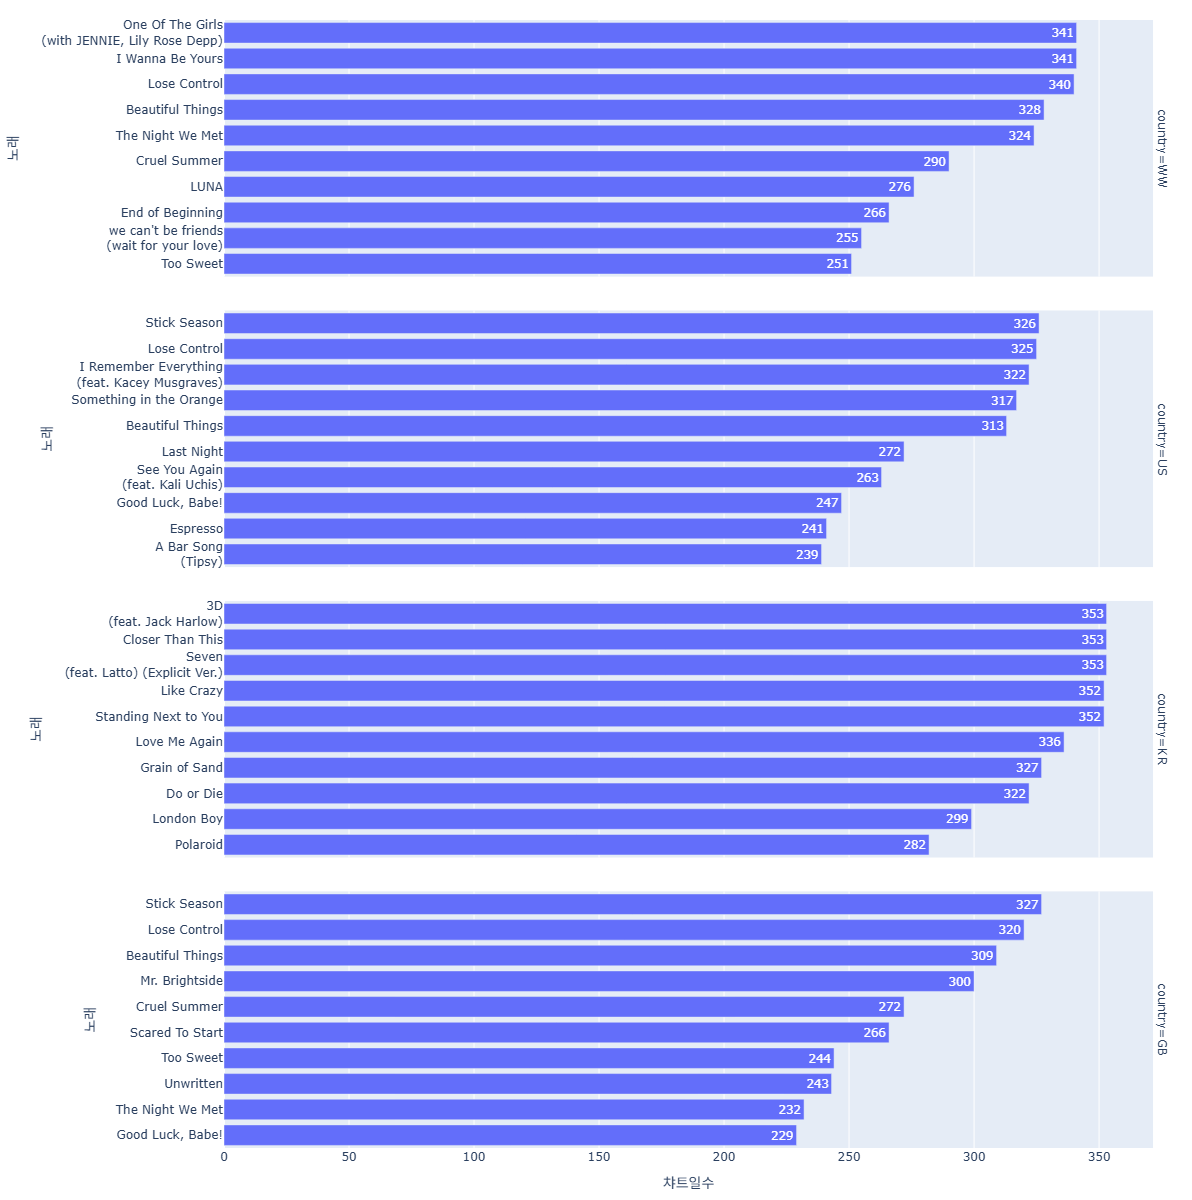

In [ ]:
fig = px.bar((df_spotify.filter(pl.col('country').is_in(['WW', 'KR', 'US', 'GB'])).
              group_by('country', 'name').
              agg(pl.col('name').len().alias('song')).sort(['country', 'song'], descending = True)
              .group_by('country', maintain_order = True).head(10).
              with_columns(pl.col('name').str.replace(' \(', '<br> ('))
             ),
             x = 'song', y = 'name', text = 'song', facet_row = 'country',
             labels = {'song':'챠트일수', 'name': '노래'},
             orientation = 'h')
fig.update_yaxes(matches=None, showticklabels=True, categoryorder = 'total ascending')
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20), height = 1200, width = 600)
fig.show(config={
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 1200,
    'width': 600,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
})

In [ ]:
(pl.concat([(df_spotify.filter(pl.col('country')=='WW', pl.col('daily_rank') == 1).
             group_by('name').
             agg(pl.col('main_vocal').first().alias('Global_Main_Vocal'),
                 pl.len().alias('Global_Chart_Days')).
             rename({"name":"Global_Song"}).sort('Global_Chart_Days', descending = True).head(10)),
            (df_spotify.filter(pl.col('country')=='KR', pl.col('daily_rank') == 1).
             group_by('name').agg(pl.col('main_vocal').first().alias('KR_Main_Vocal'),
                 pl.len().alias('KR_Chart_Days')).
             rename({"name":"KR_Song"}).sort('KR_Chart_Days', descending = True).head(10)),
            (df_spotify.filter(pl.col('country')=='US', pl.col('daily_rank') == 1).
             group_by('name').agg(pl.col('main_vocal').first().alias('US_Main_Vocal'),
                 pl.len().alias('US_Chart_Days')).
             rename({"name":"US_Song"}).sort('US_Chart_Days', descending = True).head(10)),
            (df_spotify.filter(pl.col('country')=='GB', pl.col('daily_rank') == 1).
             group_by('name').agg(pl.col('main_vocal').first().alias('GB_Main_Vocal'),
                 pl.len().alias('GB_Chart_Days')).
             rename({"name":"GB_Song"}).sort('GB_Chart_Days', descending = True).head(10))],
           how = 'horizontal').
 with_columns(pl.int_range(1, 11).alias('rank')).
 select(pl.col('rank'), pl.all().exclude('rank')).style.tab_header(title = '2024년 차트 1위 노래 Top 10').
 tab_stub(rowname_col = 'rank').
 tab_spanner('글로벌', ['Global_Song', 'Global_Main_Vocal', 'Global_Chart_Days']).
 tab_spanner('한국', ['KR_Song', 'KR_Main_Vocal', 'KR_Chart_Days']).
 tab_spanner('미국', ['US_Song', 'US_Main_Vocal', 'US_Chart_Days']).
 tab_spanner('영국', ['GB_Song', 'GB_Main_Vocal', 'GB_Chart_Days']).
 cols_align(align = 'center').
 cols_label(Global_Song='노래', Global_Main_Vocal='메인보컬', Global_Chart_Days = '차트일수',
            KR_Song='노래', KR_Main_Vocal='메인보컬', KR_Chart_Days = '차트일수',
            US_Song='노래', US_Main_Vocal='메인보컬', US_Chart_Days = '차트일수',
            GB_Song='노래', GB_Main_Vocal='메인보컬', GB_Chart_Days = '차트일수')
)

GT(_tbl_data=shape: (10, 13)
┌──────┬───────────────┬───────────────┬───────────────┬───┬──────────────┬──────────────┬──────────────┬──────────────┐
│ rank ┆ Global_Song   ┆ Global_Main_V ┆ Global_Chart_ ┆ … ┆ US_Chart_Day ┆ GB_Song      ┆ GB_Main_Voca ┆ GB_Chart_Day │
│ ---  ┆ ---           ┆ ocal          ┆ Days          ┆   ┆ s            ┆ ---          ┆ l            ┆ s            │
│ i64  ┆ str           ┆ ---           ┆ ---           ┆   ┆ ---          ┆ str          ┆ ---          ┆ ---          │
│      ┆               ┆ str           ┆ u32           ┆   ┆ u32          ┆              ┆ str          ┆ u32          │
╞══════╪═══════════════╪═══════════════╪═══════════════╪═══╪══════════════╪══════════════╪══════════════╪══════════════╡
│ 1    ┆ Die With A    ┆ Lady Gaga     ┆ 95            ┆ … ┆ 48           ┆ Stick Season ┆ Noah Kahan   ┆ 73           │
│      ┆ Smile         ┆               ┆               ┆   ┆              ┆              ┆              ┆              │
│ 2    ┆ Beautiful     ┆ Benson Boone  ┆ 36            ┆ … ┆ 35           ┆ Espresso     ┆ Sabrina      ┆ 65           │
│      ┆ Things        ┆               ┆               ┆   ┆              ┆              ┆ Carpenter    ┆              │
│ 3    ┆ Espresso      ┆ Sabrina       ┆ 33            ┆ … ┆ 34           ┆ Taste        ┆ Sabrina      ┆ 59           │
│      ┆               ┆ Carpenter     ┆               ┆   ┆              ┆              ┆ Carpenter    ┆              │
│ 4    ┆ BIRDS OF A    ┆ Billie Eilish ┆ 24            ┆ … ┆ 27           ┆ Please       ┆ Sabrina      ┆ 23           │
│      ┆ FEATHER       ┆               ┆               ┆   ┆              ┆ Please       ┆ Carpenter    ┆              │
│      ┆               ┆               ┆               ┆   ┆              ┆ Please       ┆              ┆              │
│ 5    ┆ La Diabla     ┆ Xavi          ┆ 21            ┆ … ┆ 23           ┆ Last         ┆ Wham!        ┆ 20           │
│      ┆               ┆               ┆               ┆   ┆              ┆ Christmas    ┆              ┆              │
│ 6    ┆ Who           ┆ Jimin         ┆ 20            ┆ … ┆ 18           ┆ Too Sweet    ┆ Hozier       ┆ 17           │
│ 7    ┆ Please Please ┆ Sabrina       ┆ 19            ┆ … ┆ 17           ┆ That’s So    ┆ Gracie       ┆ 13           │
│      ┆ Please        ┆ Carpenter     ┆               ┆   ┆              ┆ True         ┆ Abrams       ┆              │
│ 8    ┆ APT.          ┆ ROSÉ          ┆ 19            ┆ … ┆ 16           ┆ BACKBONE     ┆ Chase &      ┆ 9            │
│      ┆               ┆               ┆               ┆   ┆              ┆              ┆ Status       ┆              │
│ 9    ┆ i like the    ┆ Artemas       ┆ 13            ┆ … ┆ 16           ┆ BIRDS OF A   ┆ Billie       ┆ 8            │
│      ┆ way you kiss  ┆               ┆               ┆   ┆              ┆ FEATHER      ┆ Eilish       ┆              │
│      ┆ me            ┆               ┆               ┆   ┆              ┆              ┆              ┆              │
│ 10   ┆ MILLION       ┆ Tommy Richman ┆ 11            ┆ … ┆ 13           ┆ Beautiful    ┆ Benson Boone ┆ 8            │
│      ┆ DOLLAR BABY   ┆               ┆               ┆   ┆              ┆ Things       ┆              ┆              │
└──────┴───────────────┴───────────────┴───────────────┴───┴──────────────┴──────────────┴──────────────┴──────────────┘, _body=<great_tables._gt_data.Body object at 0x0000020AA5818770>, _boxhead=Boxhead([ColInfo(var='rank', type=<ColInfoTypeEnum.stub: 2>, column_label='rank', column_align='center', column_width=None), ColInfo(var='Global_Song', type=<ColInfoTypeEnum.default: 1>, column_label='노래', column_align='center', column_width=None), ColInfo(var='Global_Main_Vocal', type=<ColInfoTypeEnum.default: 1>, column_label='메인보컬', column_align='center', column_width=None), ColInfo(var='Global_Chart_Days', type=<ColInfoTypeEnum.default: 1>, column_label='차트일수', column_align='center', column_width=No

In [ ]:
print(df_spotify.
      filter(pl.col('country').is_in(['WW', 'KR', 'US', 'GB']), pl.col('daily_rank') == 1).
      select(pl.col('country'), pl.col('name').unique().len().over('country')).
      unique())


shape: (4, 2)
┌─────────┬──────┐
│ country ┆ name │
│ ---     ┆ ---  │
│ str     ┆ u32  │
╞═════════╪══════╡
│ KR      ┆ 6    │
│ US      ┆ 35   │
│ WW      ┆ 21   │
│ GB      ┆ 22   │
└─────────┴──────┘


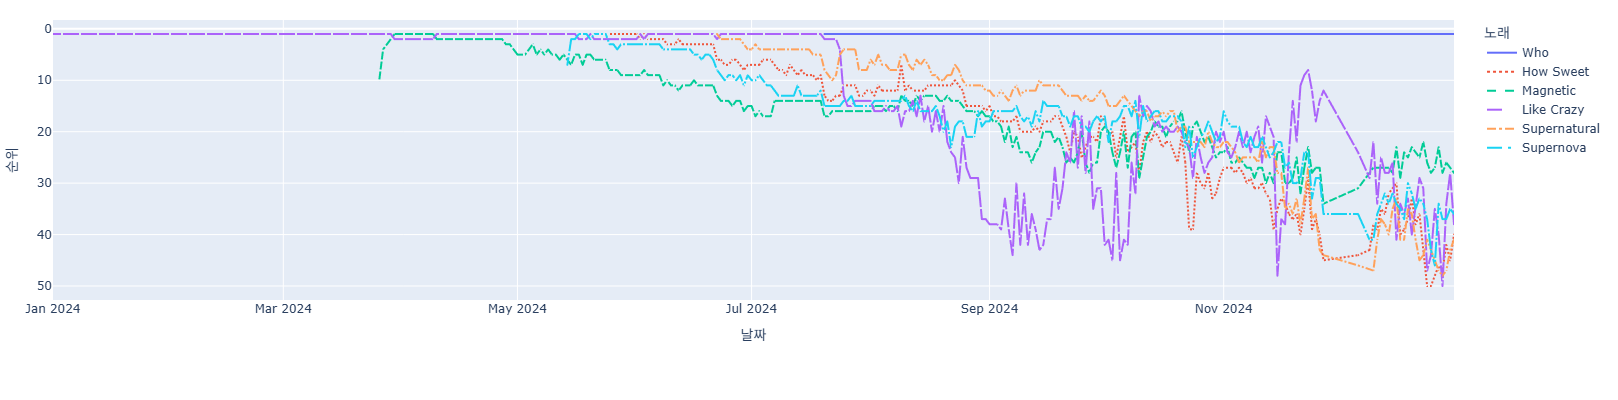

In [ ]:
fig=px.line((df_spotify.
             filter(pl.col('name').is_in(['Like Crazy', 'Who', 'Magnetic', 'How Sweet', 'Supernova', 'Supernatural']),
                    pl.col('country')=='KR')),
            x = 'snapshot_date', y = 'daily_rank', color = 'name', line_dash = 'name',
            labels = {'snapshot_date':'날짜', 'daily_rank':'순위', 'name':'노래'})
fig.update_yaxes(autorange="reversed")
fig.update_layout(margin=dict(l=20, r=20, t=20, b=100), height = 400, width = 900)
fig.show(config={
  'toImageButtonOptions': {
    'format': 'svg', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 400,
    'width': 900,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
})

In [ ]:
print(df_spotify.
      filter(pl.col('name')=='APT.', pl.col('daily_rank')==1).
      select(pl.col('continent'),
             pl.col('country').unique().len().over('continent').alias('1')).
      unique())

shape: (5, 2)
┌───────────────┬─────┐
│ continent     ┆ 1   │
│ ---           ┆ --- │
│ str           ┆ u32 │
╞═══════════════╪═════╡
│ Global        ┆ 1   │
│ Europe        ┆ 2   │
│ North America ┆ 2   │
│ Oceania       ┆ 2   │
│ Asia          ┆ 9   │
└───────────────┴─────┘


In [ ]:
with pl.Config(set_tbl_rows=25):
    print(
        df_spotify.filter(pl.col('name')=='APT.',
                          pl.col('daily_rank')==1,
                          pl.col('continent')=='Global').
        select(pl.col('snapshot_date')))

shape: (19, 1)
┌───────────────┐
│ snapshot_date │
│ ---           │
│ date          │
╞═══════════════╡
│ 2024-10-22    │
│ 2024-10-23    │
│ 2024-10-24    │
│ 2024-10-25    │
│ 2024-10-26    │
│ 2024-10-27    │
│ 2024-10-28    │
│ 2024-10-29    │
│ 2024-10-30    │
│ 2024-10-31    │
│ 2024-11-01    │
│ 2024-11-02    │
│ 2024-11-03    │
│ 2024-11-04    │
│ 2024-11-05    │
│ 2024-11-25    │
│ 2024-11-26    │
│ 2024-11-27    │
│ 2024-12-09    │
└───────────────┘


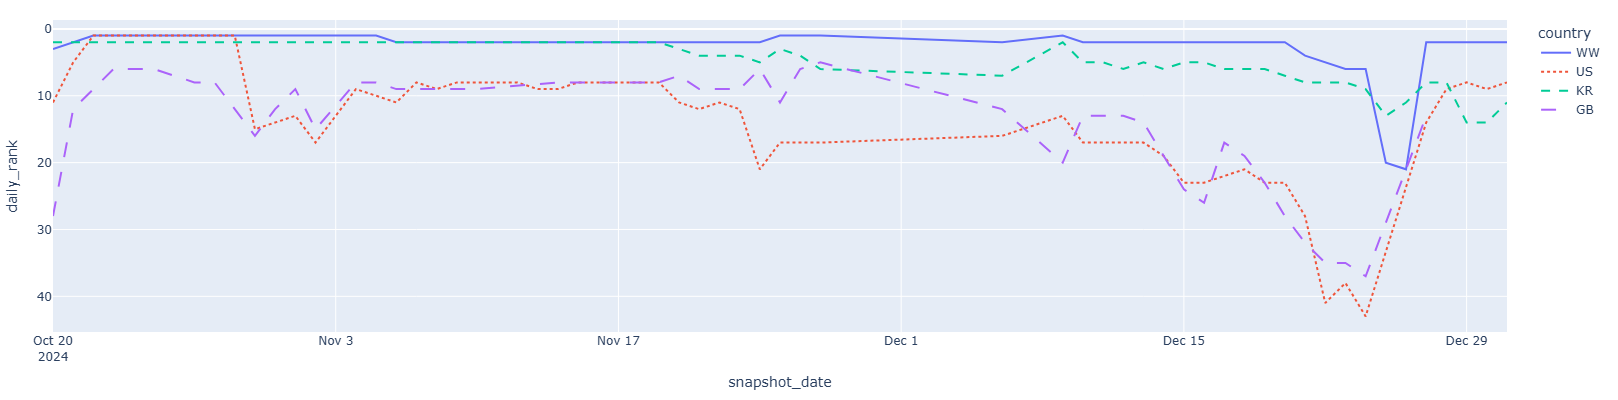

In [ ]:
fig = px.line((df_spotify.filter(pl.col('country').is_in(['WW', 'KR', 'US', 'GB']),
                  pl.col('name') =='APT.')),
        x = 'snapshot_date', y = 'daily_rank', color = 'country', line_dash = 'country')
fig.update_yaxes(autorange="reversed")
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20), height = 400, width = 900)
fig.show(config={
  'toImageButtonOptions': {
    'format': 'svg', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 400,
    'width': 900,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
})

In [ ]:
with pl.Config(set_tbl_cols=12, set_tbl_rows=25):
    print(df_spotify.filter(pl.col('country')=='KR').
          group_by(pl.col('album_release_date').dt.year()).len().sort('album_release_date'))

shape: (20, 2)
┌────────────────────┬──────┐
│ album_release_date ┆ len  │
│ ---                ┆ ---  │
│ i32                ┆ u32  │
╞════════════════════╪══════╡
│ 1957               ┆ 2    │
│ 1959               ┆ 1    │
│ 1964               ┆ 2    │
│ 1980               ┆ 10   │
│ 1984               ┆ 5    │
│ 1994               ┆ 7    │
│ 1995               ┆ 5    │
│ 2010               ┆ 11   │
│ 2011               ┆ 2    │
│ 2013               ┆ 37   │
│ 2014               ┆ 7    │
│ 2016               ┆ 4    │
│ 2017               ┆ 88   │
│ 2018               ┆ 6    │
│ 2019               ┆ 310  │
│ 2020               ┆ 47   │
│ 2021               ┆ 45   │
│ 2022               ┆ 1972 │
│ 2023               ┆ 5810 │
│ 2024               ┆ 9260 │
└────────────────────┴──────┘


In [ ]:
df_spotify_EDA4 = (
    df_spotify.filter(pl.col('name')=='APT.').
    select(pl.col('country'), pl.col('continent'),
           pl.col('country').
           map_elements(
               lambda x : pc.country_name_to_country_alpha3(pc.country_alpha2_to_country_name(x)),
               return_dtype=pl.String).alias('nation'),
           (pl.col('country').
           map_elements(
               lambda x : pc.country_alpha2_to_country_name(x),
               return_dtype=pl.String).alias('nation_name')),
           pl.col('popularity'), pl.col('daily_rank'),
           pl.col('name').len().over('country').alias('chart_days'))
    .group_by('nation').agg(pl.col('country').first(), pl.col('nation_name').first(),
                            pl.col('continent').first(),
                            pl.col('popularity').mean(), pl.col('daily_rank').mean(),
                            pl.col('chart_days').first())
)
with pl.Config(set_tbl_cols=12, set_tbl_rows=25):
    print(df_spotify_EDA4.sort('daily_rank'))

shape: (68, 7)
┌────────┬─────────┬───────────────────────────┬───────────────┬────────────┬────────────┬────────────┐
│ nation ┆ country ┆ nation_name               ┆ continent     ┆ popularity ┆ daily_rank ┆ chart_days │
│ ---    ┆ ---     ┆ ---                       ┆ ---           ┆ ---        ┆ ---        ┆ ---        │
│ str    ┆ str     ┆ str                       ┆ str           ┆ f64        ┆ f64        ┆ u32        │
╞════════╪═════════╪═══════════════════════════╪═══════════════╪════════════╪════════════╪════════════╡
│ SGP    ┆ SG      ┆ Singapore                 ┆ Asia          ┆ 90.301587  ┆ 1.238095   ┆ 63         │
│ HKG    ┆ HK      ┆ Hong Kong                 ┆ Asia          ┆ 90.301587  ┆ 1.301587   ┆ 63         │
│ MYS    ┆ MY      ┆ Malaysia                  ┆ Asia          ┆ 90.301587  ┆ 1.31746    ┆ 63         │
│ TWN    ┆ TW      ┆ Taiwan, Province of China ┆ Asia          ┆ 90.301587  ┆ 2.31746    ┆ 63         │
│ ARE    ┆ AE      ┆ United Arab Emirates      ┆ 

In [ ]:
print(df_spotify.select(pl.col('country').unique()).
      join(df_spotify_EDA4, on = 'country', how = 'anti'))

shape: (5, 1)
┌─────────┐
│ country │
│ ---     │
│ str     │
╞═════════╡
│ BY      │
│ UY      │
│ NG      │
│ EG      │
│ AR      │
└─────────┘


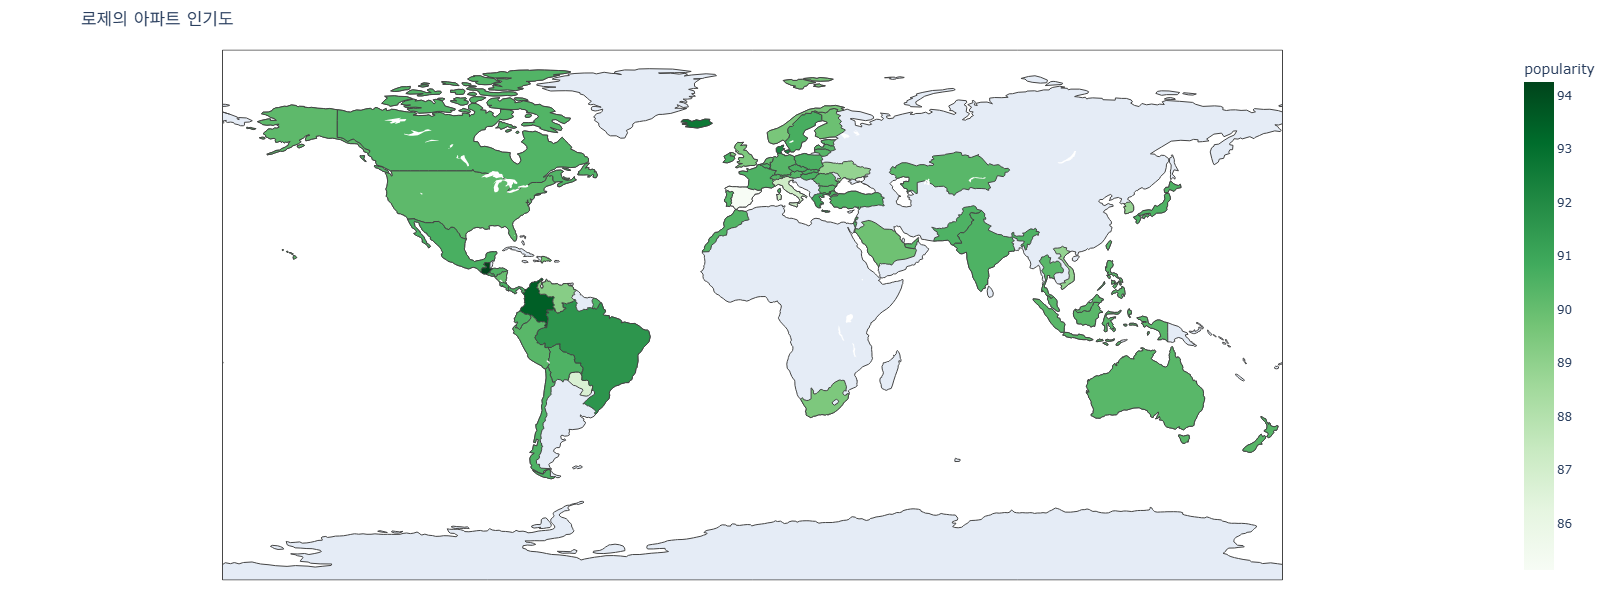

In [ ]:
fig = px.choropleth(df_spotify_EDA4,
                    locations='nation', color='popularity', scope = 'world', hover_name = 'nation_name',
                    color_continuous_scale="greens", width = 800, height = 600,
                    title='로제의 아파트 인기도')
fig.update_layout(margin=dict(l=20, r=20, t=50, b=20), height = 600, width = 800)
fig.show(config={
  'toImageButtonOptions': {
    'format': 'svg', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 600,
    'width': 800,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
})

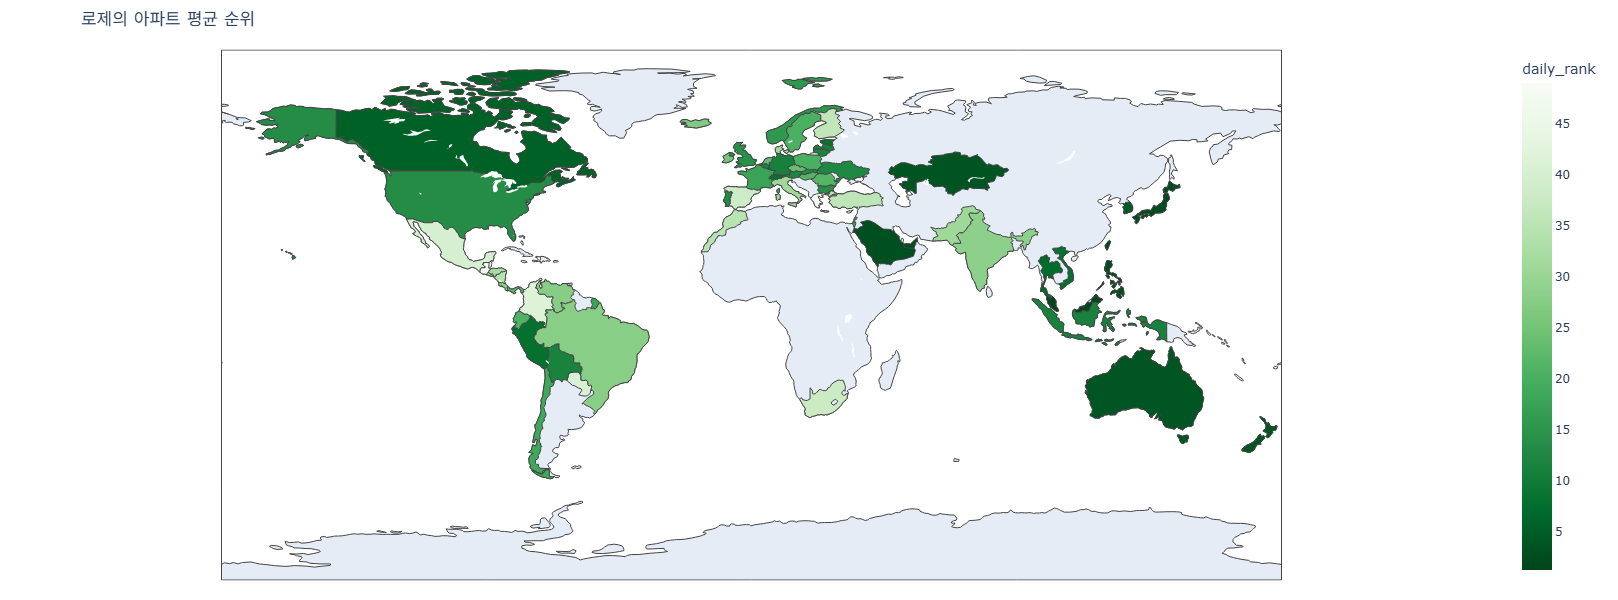

In [ ]:
fig = px.choropleth(df_spotify_EDA4,
                    locations='nation', color='daily_rank', scope = 'world',
                    hover_name = 'nation_name',
                    color_continuous_scale="greens_r", width = 800, height = 600,
                    title='로제의 아파트 평균 순위')
fig.update_layout(margin=dict(l=20, r=20, t=50, b=20))
fig.show(config={
  'toImageButtonOptions': {
    'format': 'svg', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 600,
    'width': 800,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
})

In [ ]:
print(
    df_spotify.filter(pl.col('country')=='WW',
                      pl.col('main_vocal')=='Taylor Swift').
    group_by(['main_vocal', 'name']).
    len('chart in days').sort('chart in days', descending = True).head(10)
)

shape: (10, 3)
┌──────────────┬─────────────────────────────────┬───────────────┐
│ main_vocal   ┆ name                            ┆ chart in days │
│ ---          ┆ ---                             ┆ ---           │
│ str          ┆ str                             ┆ u32           │
╞══════════════╪═════════════════════════════════╪═══════════════╡
│ Taylor Swift ┆ Cruel Summer                    ┆ 290           │
│ Taylor Swift ┆ Fortnight (feat. Post Malone)   ┆ 119           │
│ Taylor Swift ┆ I Can Do It With a Broken Hear… ┆ 76            │
│ Taylor Swift ┆ Down Bad                        ┆ 32            │
│ Taylor Swift ┆ Who’s Afraid of Little Old Me?  ┆ 27            │
│ Taylor Swift ┆ Guilty as Sin?                  ┆ 27            │
│ Taylor Swift ┆ My Boy Only Breaks His Favorit… ┆ 24            │
│ Taylor Swift ┆ But Daddy I Love Him            ┆ 24            │
│ Taylor Swift ┆ So Long, London                 ┆ 24            │
│ Taylor Swift ┆ Florida!!! (feat. Florence + T

In [ ]:
print(
    df_spotify.filter(pl.col('country')=='KR',
                      pl.col('main_vocal')=='Jimin').
    group_by(['main_vocal', 'name']).
    len('chart in days').sort('chart in days', descending = True).head(10)
)

shape: (10, 3)
┌────────────┬─────────────────────────────────┬───────────────┐
│ main_vocal ┆ name                            ┆ chart in days │
│ ---        ┆ ---                             ┆ ---           │
│ str        ┆ str                             ┆ u32           │
╞════════════╪═════════════════════════════════╪═══════════════╡
│ Jimin      ┆ Closer Than This                ┆ 353           │
│ Jimin      ┆ Like Crazy                      ┆ 352           │
│ Jimin      ┆ Like Crazy (English Version)    ┆ 201           │
│ Jimin      ┆ Set Me Free Pt.2                ┆ 201           │
│ Jimin      ┆ Alone                           ┆ 180           │
│ Jimin      ┆ Face-off                        ┆ 179           │
│ Jimin      ┆ Smeraldo Garden Marching Band … ┆ 176           │
│ Jimin      ┆ Slow Dance (feat. Sofia Carson… ┆ 155           │
│ Jimin      ┆ Interlude : Showtime            ┆ 155           │
│ Jimin      ┆ Who                             ┆ 155           │
└─────────

In [ ]:
df_spotify.select(pl.col('snapshot_date').unique())

snapshot_date
date
2024-01-01
2024-01-02
2024-01-03
2024-01-04
2024-01-05
…
2024-12-27
2024-12-28
2024-12-29


In [ ]:
print(df_spotify.filter(pl.col('country')=='KR',
                  pl.col('name') =='APT.').select(pl.col('daily_rank').min())
     )

shape: (1, 1)
┌────────────┐
│ daily_rank │
│ ---        │
│ i64        │
╞════════════╡
│ 2          │
└────────────┘


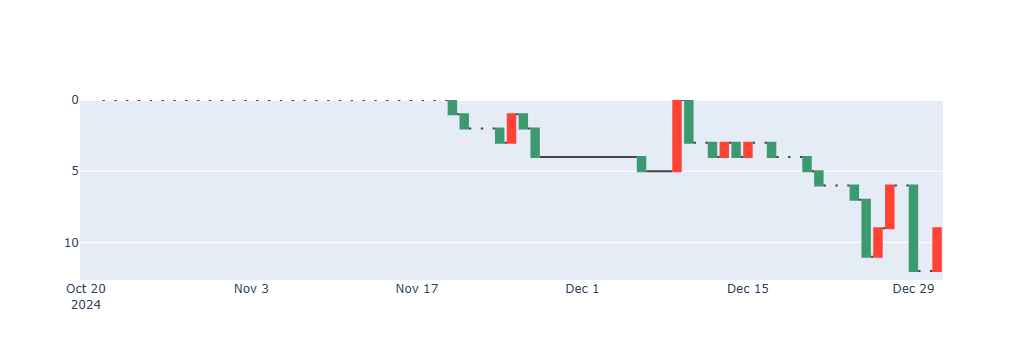

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    x = (df_spotify.filter(pl.col('country')=='KR',
                  pl.col('name') =='APT.').select(pl.col('snapshot_date')).to_series()),
    textposition = "outside",
    y = (df_spotify.filter(pl.col('country')=='KR',
                  pl.col('name') =='APT.').select(pl.col('daily_rank').diff().alias('daily_movement')).to_series()),
))
fig.update_yaxes(autorange="reversed")
fig.show()


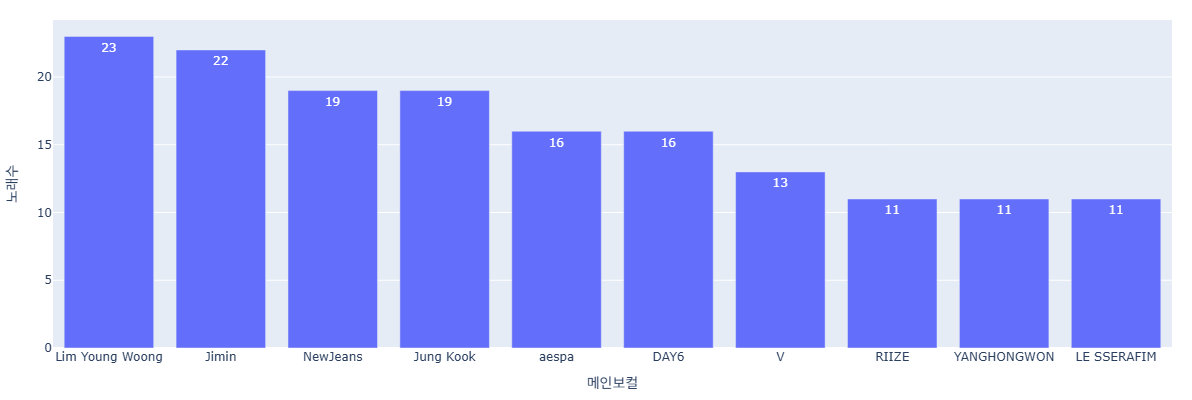

In [ ]:
fig = px.bar((df_spotify.filter(pl.col('country')=='KR').
              group_by('main_vocal').
              agg(pl.col('name').unique().len()).
              sort('name', descending = True).head(10)
              ),
             x = 'main_vocal', y = 'name', text = 'name',
             labels = {'main_vocal':'메인보컬', 'name': '노래수'})
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20), height = 400, width = 600)
fig.show(config=config)

In [ ]:
df_spotify1.group_by('key', 'mode').agg(pl.col('popularity').mean()).sort('key')

key,mode,popularity
enum,str,f64
"""C""","""Minor""",76.157967
"""C""","""Major""",75.090999
"""C#""","""Minor""",76.434212
"""C#""","""Major""",74.560635
"""D""","""Minor""",78.527102
…,…,…
"""A""","""Minor""",80.209199
"""Bb""","""Minor""",79.218938
"""Bb""","""Major""",70.660623


In [ ]:
df_spotify.filter(pl.col('country')=='kr')

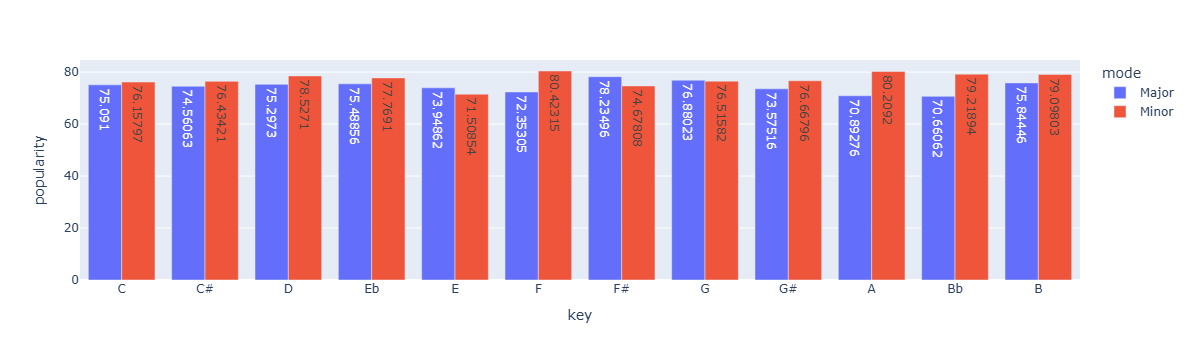

In [ ]:
df_spotify1 = df_spotify.with_columns(
    pl.col('mode').cast(pl.String).\
    replace(['0', '1'], ['Major', 'Minor']))

px.bar(df_spotify1.group_by('key', 'mode').agg(pl.col('popularity').mean()).sort('key'),
             x = 'key', y = 'popularity', color = 'mode', barmode='group', text_auto=True).show()

In [ ]:
df_spotify.filter(pl.col('country')=='WW').group_by('main_vocal').len().sort('len', descending = True).head(10)

main_vocal,len
str,u32
"""Taylor Swift""",1137
"""The Weeknd""",864
"""Billie Eilish""",838
"""Sabrina Carpenter""",833
"""Ariana Grande""",519
"""Jung Kook""",483
"""Benson Boone""",473
"""Arctic Monkeys""",421
"""Bad Bunny""",403


In [ ]:
df_spotify.select(pl.col(pl.Float64)).describe()

In [ ]:
px.histogram(df_spotify, x = 'loudness', nbins = 200)

In [ ]:
df_spotify = df_spotify.with_columns(
    pl.col('mode').cast(pl.String).\
    replace(['0', '1'], ['Major', 'Minor']))
df_spotify

In [ ]:
df_spotify.group_by('mode').len('count')

In [ ]:
px.pie(df_spotify.group_by('mode').len('count'), names = 'mode', values='count').show()

In [ ]:
px.histogram(df_spotify, x = 'speechiness', nbins = 200)

In [ ]:
px.histogram(df_spotify, x = 'acousticness', nbins = 200)

In [ ]:
px.histogram(df_spotify, x = 'instrumentalness', nbins = 200)

In [ ]:
px.histogram(df_spotify, x = 'liveness', nbins = 200)

In [ ]:
px.histogram(df_spotify, x = 'valence', nbins = 200)

In [ ]:
px.histogram(df_spotify, x = 'tempo', nbins = 200)

In [ ]:
px.histogram(df_spotify, x = 'time_signature')

In [ ]:
df_spotify.select(pl.col(pl.Int64), pl.col(pl.Float64)).corr().\
with_columns(index = pl.lit(pl.Series(df_spotify.select(pl.col(pl.Int64), pl.col(pl.Float64)).columns))).\
unpivot(index = 'index').\
filter(pl.col('index')!=pl.col('variable')).sort('value', descending = True)

index,variable,value
str,str,f64
"""loudness""","""energy""",0.72074
"""energy""","""loudness""",0.72074
"""valence""","""danceability""",0.405192
"""danceability""","""valence""",0.405192
"""valence""","""energy""",0.35708
…,…,…
"""daily_rank""","""weekly_movement""",-0.268917
"""acousticness""","""loudness""",-0.435082
"""loudness""","""acousticness""",-0.435082


In [ ]:
df_spotify.filter(pl.col('country')=='KR').select(pl.col(pl.Int64), pl.col(pl.Float64)).corr().\
with_columns(index = pl.lit(pl.Series(df_spotify.select(pl.col(pl.Int64), pl.col(pl.Float64)).columns))).\
unpivot(index = 'index').\
filter(pl.col('index')!=pl.col('variable')).sort('value', descending = True)

In [ ]:
df_spotify.select(pl.col('loudness'), pl.col('energy'))

In [ ]:
px.scatter(df_spotify.filter(pl.col('country')=='KR').select(pl.col('valence'), pl.col('energy')).sample(fraction = 0.1), x = 'valence', y = 'energy')

In [ ]:
px.scatter(df_spotify.filter(pl.col('country')=='KR').select(pl.col('energy'), pl.col('acousticness')).sample(fraction = 0.2), x = 'energy', y = 'acousticness', trendline = 'ols')

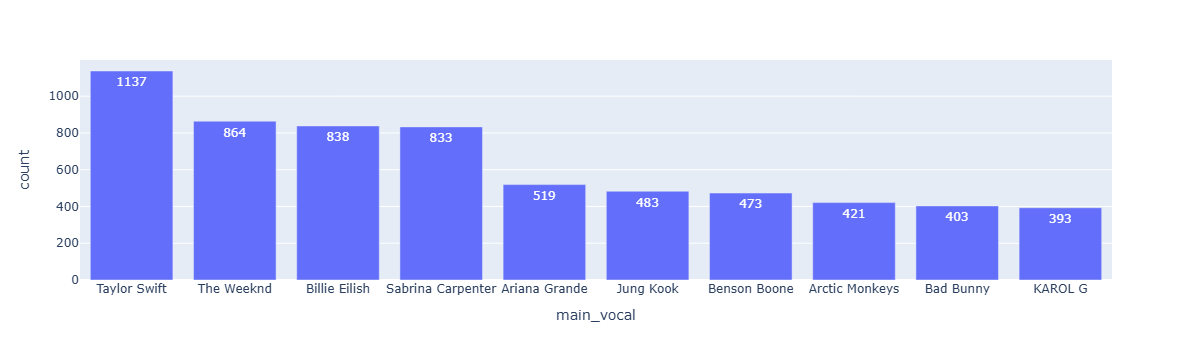

In [ ]:
px.bar(df_spotify.filter(pl.col('country')=='WW').group_by('main_vocal').len('count').sort('count', descending = True).head(10),
       x = 'main_vocal', y = 'count', text = 'count')

In [ ]:
px.bar(df_spotify.filter(pl.col('country')=='KR').group_by('main_vocal').len('count').sort('count', descending = True).head(10),
       x = 'main_vocal', y = 'count', text = 'count')

In [ ]:
px.bar(df_spotify.filter(pl.col('country')=='US').group_by('main_vocal').len('count').sort('count', descending = True).head(10),
       x = 'main_vocal', y = 'count', text = 'count')

In [ ]:
px.bar(df_spotify.filter(pl.col('country')=='WW').group_by('name').agg(pl.col('main_vocal').first(), pl.len().alias('count')).sort('count', descending = True).head(10),
       x = 'name', y = 'count', text = 'count', hover_data=["name", "main_vocal", "count"])

In [ ]:
df_spotify.filter(pl.col('country')=='WW').group_by('name').agg(pl.col('main_vocal').first(), pl.len().alias('count')).sort('count', descending = True).head(10)

In [ ]:
px.bar(df_spotify.filter(pl.col('country')=='KR').group_by('name').agg(pl.col('main_vocal').first(), pl.len().alias('count')).sort('count', descending = True).head(10),
       x = 'name', y = 'count', text = 'count', hover_data=["name", "main_vocal", "count"])

In [ ]:
df_spotify.filter(pl.col('country')=='KR').group_by('name').agg(pl.col('main_vocal').first(), pl.len().alias('count')).sort('count', descending = True).head(10)

In [ ]:
px.bar(df_spotify.filter(pl.col('country')=='US').group_by('name').agg(pl.col('main_vocal').first(), pl.len().alias('count')).sort('count', descending = True).head(10),
       x = 'name', y = 'count', text = 'count', hover_data=["name", "main_vocal", "count"])

In [ ]:
df_spotify.filter(pl.col('country')=='US').group_by('name').agg(pl.col('main_vocal').first(), pl.len().alias('count')).sort('count', descending = True).head(10)

In [ ]:
df_spotify.filter(pl.col('country')=='WW', pl.col('daily_rank') == 1).group_by('name').agg(pl.col('main_vocal').first(), pl.len().alias('count')).sort('count', descending = True).head(10)

In [ ]:
df_spotify.filter(pl.col('country')=='KR', pl.col('daily_rank') == 1).group_by('name').agg(pl.col('main_vocal').first(), pl.len().alias('count')).sort('count', descending = True).head(10)

name,main_vocal,count
str,str,u32
"""Like Crazy""","""Jimin""",170
"""Who""","""Jimin""",155
"""Magnetic""","""ILLIT""",11
"""How Sweet""","""NewJeans""",9
"""Supernova""","""aespa""",7
"""Supernatural""","""NewJeans""",1


In [ ]:
df_spotify.filter(pl.col('country')=='KR', pl.col('daily_rank') == 1, pl.col('name') == 'Like Crazy')

spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,main_vocal,featuring,continent
str,str,list[str],i64,i64,i64,str,date,i64,bool,i64,str,date,f64,f64,enum,f64,i64,f64,f64,f64,f64,f64,f64,i64,str,list[str],str
"""3Ua0m0YmEjrMi9XErKcNiR""","""Like Crazy""","[""Jimin""]",1,0,0,"""KR""",2024-01-01,91,false,212241,"""FACE""",2023-03-24,0.629,0.733,"""G""",-5.445,1,0.0419,0.0025,0.0,0.357,0.362,120.001,4,"""Jimin""",null,"""Asia"""
"""3Ua0m0YmEjrMi9XErKcNiR""","""Like Crazy""","[""Jimin""]",1,0,0,"""KR""",2024-01-02,91,false,212241,"""FACE""",2023-03-24,0.629,0.733,"""G""",-5.445,1,0.0419,0.0025,0.0,0.357,0.362,120.001,4,"""Jimin""",null,"""Asia"""
"""3Ua0m0YmEjrMi9XErKcNiR""","""Like Crazy""","[""Jimin""]",1,0,0,"""KR""",2024-01-03,92,false,212241,"""FACE""",2023-03-24,0.629,0.733,"""G""",-5.445,1,0.0419,0.0025,0.0,0.357,0.362,120.001,4,"""Jimin""",null,"""Asia"""
"""3Ua0m0YmEjrMi9XErKcNiR""","""Like Crazy""","[""Jimin""]",1,0,0,"""KR""",2024-01-04,92,false,212241,"""FACE""",2023-03-24,0.629,0.733,"""G""",-5.445,1,0.0419,0.0025,0.0,0.357,0.362,120.001,4,"""Jimin""",null,"""Asia"""
"""3Ua0m0YmEjrMi9XErKcNiR""","""Like Crazy""","[""Jimin""]",1,0,0,"""KR""",2024-01-05,92,false,212241,"""FACE""",2023-03-24,0.629,0.733,"""G""",-5.445,1,0.0419,0.0025,0.0,0.357,0.362,120.001,4,"""Jimin""",null,"""Asia"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""3Ua0m0YmEjrMi9XErKcNiR""","""Like Crazy""","[""Jimin""]",1,0,0,"""KR""",2024-07-15,89,false,212241,"""FACE""",2023-03-24,0.629,0.733,"""G""",-5.445,1,0.0419,0.0025,0.0,0.357,0.362,120.001,4,"""Jimin""",null,"""Asia"""
"""3Ua0m0YmEjrMi9XErKcNiR""","""Like Crazy""","[""Jimin""]",1,0,0,"""KR""",2024-07-16,89,false,212241,"""FACE""",2023-03-24,0.629,0.733,"""G""",-5.445,1,0.0419,0.0025,0.0,0.357,0.362,120.001,4,"""Jimin""",null,"""Asia"""
"""3Ua0m0YmEjrMi9XErKcNiR""","""Like Crazy""","[""Jimin""]",1,0,0,"""KR""",2024-07-17,89,false,212241,"""FACE""",2023-03-24,0.629,0.733,"""G""",-5.445,1,0.0419,0.0025,0.0,0.357,0.362,120.001,4,"""Jimin""",null,"""Asia"""


In [ ]:
df_spotify.filter(pl.col('country')=='KR', pl.col('daily_rank') == 1).sort('snapshot_date')

spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,main_vocal,featuring,continent
str,str,list[str],i64,i64,i64,str,date,i64,bool,i64,str,date,f64,f64,enum,f64,i64,f64,f64,f64,f64,f64,f64,i64,str,list[str],str
"""3Ua0m0YmEjrMi9XErKcNiR""","""Like Crazy""","[""Jimin""]",1,0,0,"""KR""",2024-01-01,91,false,212241,"""FACE""",2023-03-24,0.629,0.733,"""G""",-5.445,1,0.0419,0.0025,0.0,0.357,0.362,120.001,4,"""Jimin""",null,"""Asia"""
"""3Ua0m0YmEjrMi9XErKcNiR""","""Like Crazy""","[""Jimin""]",1,0,0,"""KR""",2024-01-02,91,false,212241,"""FACE""",2023-03-24,0.629,0.733,"""G""",-5.445,1,0.0419,0.0025,0.0,0.357,0.362,120.001,4,"""Jimin""",null,"""Asia"""
"""3Ua0m0YmEjrMi9XErKcNiR""","""Like Crazy""","[""Jimin""]",1,0,0,"""KR""",2024-01-03,92,false,212241,"""FACE""",2023-03-24,0.629,0.733,"""G""",-5.445,1,0.0419,0.0025,0.0,0.357,0.362,120.001,4,"""Jimin""",null,"""Asia"""
"""3Ua0m0YmEjrMi9XErKcNiR""","""Like Crazy""","[""Jimin""]",1,0,0,"""KR""",2024-01-04,92,false,212241,"""FACE""",2023-03-24,0.629,0.733,"""G""",-5.445,1,0.0419,0.0025,0.0,0.357,0.362,120.001,4,"""Jimin""",null,"""Asia"""
"""3Ua0m0YmEjrMi9XErKcNiR""","""Like Crazy""","[""Jimin""]",1,0,0,"""KR""",2024-01-05,92,false,212241,"""FACE""",2023-03-24,0.629,0.733,"""G""",-5.445,1,0.0419,0.0025,0.0,0.357,0.362,120.001,4,"""Jimin""",null,"""Asia"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""7tI8dRuH2Yc6RuoTjxo4dU""","""Who""","[""Jimin""]",1,0,0,"""KR""",2024-12-27,90,false,170887,"""MUSE""",2024-07-19,0.66,0.756,"""C""",-3.743,0,0.032,0.00289,0.0,0.193,0.838,116.034,4,"""Jimin""",null,"""Asia"""
"""7tI8dRuH2Yc6RuoTjxo4dU""","""Who""","[""Jimin""]",1,0,0,"""KR""",2024-12-28,90,false,170887,"""MUSE""",2024-07-19,0.66,0.756,"""C""",-3.743,0,0.032,0.00289,0.0,0.193,0.838,116.034,4,"""Jimin""",null,"""Asia"""
"""7tI8dRuH2Yc6RuoTjxo4dU""","""Who""","[""Jimin""]",1,0,0,"""KR""",2024-12-29,90,false,170887,"""MUSE""",2024-07-19,0.66,0.756,"""C""",-3.743,0,0.032,0.00289,0.0,0.193,0.838,116.034,4,"""Jimin""",null,"""Asia"""


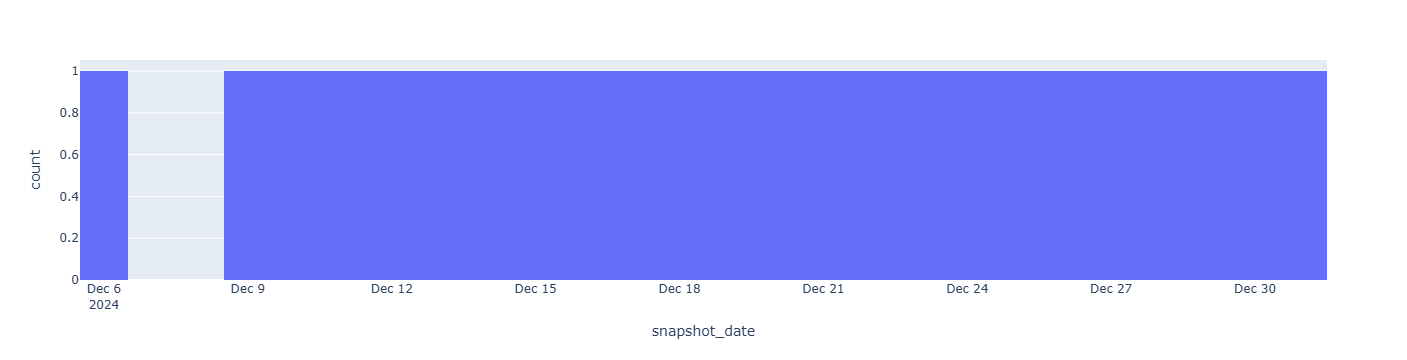

In [ ]:
px.histogram(df_spotify.filter(pl.col('country')=='KR', pl.col('daily_rank') == 1, pl.col('snapshot_date').dt.month() == 12).sort('snapshot_date'),
             x = 'snapshot_date', nbins = 31)

In [ ]:
df_spotify.filter(pl.col('country')=='KR', pl.col('daily_rank') == 1, pl.col('snapshot_date').dt.month() == 12)

spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,main_vocal,featuring,continent
str,str,list[str],i64,i64,i64,str,date,i64,bool,i64,str,date,f64,f64,enum,f64,i64,f64,f64,f64,f64,f64,f64,i64,str,list[str],str
"""7tI8dRuH2Yc6RuoTjxo4dU""","""Who""","[""Jimin""]",1,49,49,"""KR""",2024-12-06,92,false,170887,"""MUSE""",2024-07-19,0.66,0.756,"""C""",-3.743,0,0.032,0.00289,0.0,0.193,0.838,116.034,4,"""Jimin""",null,"""Asia"""
"""7tI8dRuH2Yc6RuoTjxo4dU""","""Who""","[""Jimin""]",1,49,49,"""KR""",2024-12-09,92,false,170887,"""MUSE""",2024-07-19,0.66,0.756,"""C""",-3.743,0,0.032,0.00289,0.0,0.193,0.838,116.034,4,"""Jimin""",null,"""Asia"""
"""7tI8dRuH2Yc6RuoTjxo4dU""","""Who""","[""Jimin""]",1,0,49,"""KR""",2024-12-10,91,false,170887,"""MUSE""",2024-07-19,0.66,0.756,"""C""",-3.743,0,0.032,0.00289,0.0,0.193,0.838,116.034,4,"""Jimin""",null,"""Asia"""
"""7tI8dRuH2Yc6RuoTjxo4dU""","""Who""","[""Jimin""]",1,0,49,"""KR""",2024-12-11,91,false,170887,"""MUSE""",2024-07-19,0.66,0.756,"""C""",-3.743,0,0.032,0.00289,0.0,0.193,0.838,116.034,4,"""Jimin""",null,"""Asia"""
"""7tI8dRuH2Yc6RuoTjxo4dU""","""Who""","[""Jimin""]",1,0,49,"""KR""",2024-12-12,91,false,170887,"""MUSE""",2024-07-19,0.66,0.756,"""C""",-3.743,0,0.032,0.00289,0.0,0.193,0.838,116.034,4,"""Jimin""",null,"""Asia"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""7tI8dRuH2Yc6RuoTjxo4dU""","""Who""","[""Jimin""]",1,0,0,"""KR""",2024-12-27,90,false,170887,"""MUSE""",2024-07-19,0.66,0.756,"""C""",-3.743,0,0.032,0.00289,0.0,0.193,0.838,116.034,4,"""Jimin""",null,"""Asia"""
"""7tI8dRuH2Yc6RuoTjxo4dU""","""Who""","[""Jimin""]",1,0,0,"""KR""",2024-12-28,90,false,170887,"""MUSE""",2024-07-19,0.66,0.756,"""C""",-3.743,0,0.032,0.00289,0.0,0.193,0.838,116.034,4,"""Jimin""",null,"""Asia"""
"""7tI8dRuH2Yc6RuoTjxo4dU""","""Who""","[""Jimin""]",1,0,0,"""KR""",2024-12-29,90,false,170887,"""MUSE""",2024-07-19,0.66,0.756,"""C""",-3.743,0,0.032,0.00289,0.0,0.193,0.838,116.034,4,"""Jimin""",null,"""Asia"""
